## Machine Learning

### Bike Sharing Study

In [2]:
# Files


# Readme.txt
# hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
# day.csv - bike sharing counts aggregated on daily basis. Records: 731 days


# Dataset characteristics

# Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv


# season : season (1:springer, 2:summer, 3:fall, 4:winter)
# yr : year (0: 2011, 1:2012)
# mnth : month ( 1 to 12)
# hr : hour (0 to 23)

#    holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

#    workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

#    weathersit : 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

# temp : Normalized temperature in Celsius. The values are divided to 41 (max)
# atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
# hum: Normalized humidity. The values are divided to 100 (max)
# windspeed: Normalized wind speed. The values are divided to 67 (max)
# casual: count of casual users
# registered: count of registered users

In [3]:
import numpy as np
import pandas as pd

In [4]:
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

In [5]:
day_df

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.shape

(731, 16)

In [8]:
hour_df

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.shape

(17379, 17)

### Preprocessing - Data Exploration

In [11]:
# Renaming columns names to more readable names

day_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [12]:
# Renaming columns names to more readable names
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [13]:
# Creating a feature for weekend

hour_df.loc[(hour_df['weekday'] < 6) & (hour_df['weekday'] > 0), 'is_weekend'] = 'No'

hour_df.loc[(hour_df['weekday'] == 0) | (hour_df['weekday'] == 6), 'is_weekend'] = 'Yes'

In [14]:
# Creating a feature for weekend

day_df.loc[(day_df['weekday'] < 6) & (day_df['weekday'] > 0), 'is_weekend'] = 'No'

day_df.loc[(day_df['weekday'] == 0) | (day_df['weekday'] == 6), 'is_weekend'] = 'Yes'

In [15]:
# Defining holiday - Yes or No

hour_df.loc[hour_df['is_holiday'] == 0, 'is_holiday'] = 'No'

hour_df.loc[hour_df['is_holiday'] == 1, 'is_holiday'] = 'Yes'

In [16]:
# Defining holiday - Yes or No

day_df.loc[day_df['is_holiday'] == 0, 'is_holiday'] = 'No'

day_df.loc[day_df['is_holiday'] == 1, 'is_holiday'] = 'Yes'

In [17]:
# Chaning season names

hour_df.loc[hour_df['season'] == 1, 'season'] = 'Winter'
hour_df.loc[hour_df['season'] == 2, 'season'] = 'Spring'
hour_df.loc[hour_df['season'] == 3, 'season'] = 'Summer'
hour_df.loc[hour_df['season'] == 4, 'season'] = 'Fall'

In [18]:
# Chaning season names

day_df.loc[hour_df['season'] == 1, 'season'] = 'Winter'
day_df.loc[hour_df['season'] == 2, 'season'] = 'Spring'
day_df.loc[hour_df['season'] == 3, 'season'] = 'Summer'
day_df.loc[hour_df['season'] == 4, 'season'] = 'Fall'

In [19]:
day_df.head()

rec_id    datetime season  year  month is_holiday  weekday  is_workingday  \
0       1  2011-01-01      1     0      1         No        6              0   
1       2  2011-01-02      1     0      1         No        0              0   
2       3  2011-01-03      1     0      1         No        1              1   
3       4  2011-01-04      1     0      1         No        2              1   
4       5  2011-01-05      1     0      1         No        3              1   

   weather_condition      temp     atemp  humidity  windspeed  casual  \
0                  2  0.344167  0.363625  0.805833   0.160446     331   
1                  2  0.363478  0.353739  0.696087   0.248539     131   
2                  1  0.196364  0.189405  0.437273   0.248309     120   
3                  1  0.200000  0.212122  0.590435   0.160296     108   
4                  1  0.226957  0.229270  0.436957   0.186900      82   

   registered  total_count is_weekend  
0         654          985        Yes  
1         670          801        Yes  
2        1229         1349         No  
3        1454         1562         No  
4        1518         1600         No

In [20]:
hour_df.head()

rec_id    datetime  season  year  month  hour is_holiday  weekday  \
0       1  2011-01-01  Winter     0      1     0         No        6   
1       2  2011-01-01  Winter     0      1     1         No        6   
2       3  2011-01-01  Winter     0      1     2         No        6   
3       4  2011-01-01  Winter     0      1     3         No        6   
4       5  2011-01-01  Winter     0      1     4         No        6   

   is_workingday  weather_condition  temp   atemp  humidity  windspeed  \
0              0                  1  0.24  0.2879      0.81        0.0   
1              0                  1  0.22  0.2727      0.80        0.0   
2              0                  1  0.22  0.2727      0.80        0.0   
3              0                  1  0.24  0.2879      0.75        0.0   
4              0                  1  0.24  0.2879      0.75        0.0   

   casual  registered  total_count is_weekend  
0       3          13           16        Yes  
1       8          32           40        Yes  
2       5          27           32        Yes  
3       3          10           13        Yes  
4       0           1            1        Yes

In [21]:
# Dealinh with missing values - using isnull() function  

hour_df.isnull()

rec_id  datetime  season   year  month   hour  is_holiday  weekday  \
0       False     False   False  False  False  False       False    False   
1       False     False   False  False  False  False       False    False   
2       False     False   False  False  False  False       False    False   
3       False     False   False  False  False  False       False    False   
4       False     False   False  False  False  False       False    False   
...       ...       ...     ...    ...    ...    ...         ...      ...   
17374   False     False   False  False  False  False       False    False   
17375   False     False   False  False  False  False       False    False   
17376   False     False   False  False  False  False       False    False   
17377   False     False   False  False  False  False       False    False   
17378   False     False   False  False  False  False       False    False   

       is_workingday  weather_condition   temp  atemp  humidity  windspeed  \
0              False              False  False  False     False      False   
1              False              False  False  False     False      False   
2              False              False  False  False     False      False   
3              False              False  False  False     False      False   
4              False              False  False  False     False      False   
...              ...                ...    ...    ...       ...        ...   
17374          False              False  False  False     False      False   
17375          False              False  False  False     False      False   
17376          False              False  False  False     False      False   
17377          False              False  False  False     False      False   
17378          False              False  False  False     False      False   

       casual  registered  total_count  is_weekend  
0       False       False        False       False  
1       False       False        False       False  
2       False       False        False       False  
3       False       False        False       False  
4       False       False        False       False  
...       ...         ...          ...         ...  
17374   False       False        False       False  
17375   False       False        False       False  
17376   False       False        False       False  
17377   False       False        False       False  
17378   False       False        False       False  

[17379 rows x 18 columns]

In [233]:
#check for any missing values

hour_df.isnull().values.any()

False

In [22]:
# Dealinh with missing values - using isnull() function  

day_df.isnull()

rec_id  datetime  season   year  month  is_holiday  weekday  \
0     False     False   False  False  False       False    False   
1     False     False   False  False  False       False    False   
2     False     False   False  False  False       False    False   
3     False     False   False  False  False       False    False   
4     False     False   False  False  False       False    False   
..      ...       ...     ...    ...    ...         ...      ...   
726   False     False   False  False  False       False    False   
727   False     False   False  False  False       False    False   
728   False     False   False  False  False       False    False   
729   False     False   False  False  False       False    False   
730   False     False   False  False  False       False    False   

     is_workingday  weather_condition   temp  atemp  humidity  windspeed  \
0            False              False  False  False     False      False   
1            False              False  False  False     False      False   
2            False              False  False  False     False      False   
3            False              False  False  False     False      False   
4            False              False  False  False     False      False   
..             ...                ...    ...    ...       ...        ...   
726          False              False  False  False     False      False   
727          False              False  False  False     False      False   
728          False              False  False  False     False      False   
729          False              False  False  False     False      False   
730          False              False  False  False     False      False   

     casual  registered  total_count  is_weekend  
0     False       False        False       False  
1     False       False        False       False  
2     False       False        False       False  
3     False       False        False       False  
4     False       False        False       False  
..      ...         ...          ...         ...  
726   False       False        False       False  
727   False       False        False       False  
728   False       False        False       False  
729   False       False        False       False  
730   False       False        False       False  

[731 rows x 17 columns]

In [234]:
#check for any missing values

day_df.isnull().values.any()

False

In [148]:
# The attribute dteday would require type conversion from object (or string type) to timestamp.

  # That is, 'dteday' should be a 'datetime' object.

In [149]:
pd.to_datetime(hour_df.datetime)

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: datetime, Length: 16678, dtype: datetime64[ns]

In [150]:
pd.to_datetime(day_df.datetime)

0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: datetime, Length: 731, dtype: datetime64[ns]

In [151]:
# Setting proper data types - HOUR DF

# date time conversion

hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

In [152]:
# Setting proper data types - DAY DF

# date time conversion

day_df['datetime'] = pd.to_datetime(day_df.datetime)

In [153]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16678 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             16678 non-null  int64         
 1   datetime           16678 non-null  datetime64[ns]
 2   season             16678 non-null  object        
 3   year               16678 non-null  int64         
 4   month              16678 non-null  int64         
 5   hour               16678 non-null  int64         
 6   is_holiday         16678 non-null  object        
 7   weekday            16678 non-null  int64         
 8   is_workingday      16678 non-null  int64         
 9   weather_condition  16678 non-null  int64         
 10  temp               16678 non-null  float64       
 11  atemp              16678 non-null  float64       
 12  humidity           16678 non-null  float64       
 13  windspeed          16678 non-null  float64       
 14  casual

In [29]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             731 non-null    int64         
 1   datetime           731 non-null    datetime64[ns]
 2   season             731 non-null    object        
 3   year               731 non-null    int64         
 4   month              731 non-null    int64         
 5   is_holiday         731 non-null    object        
 6   weekday            731 non-null    int64         
 7   is_workingday      731 non-null    int64         
 8   weather_condition  731 non-null    int64         
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

### Dealing with Temperature 

In [32]:
hour_df.temp = hour_df.temp*47 - 8 # Converting temperature to Celsius

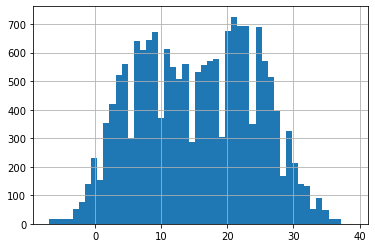

In [33]:
hour_df.temp.hist(bins= 50);

In [34]:
day_df.temp = day_df.temp*47 - 8 # Converting temperature to Celsius

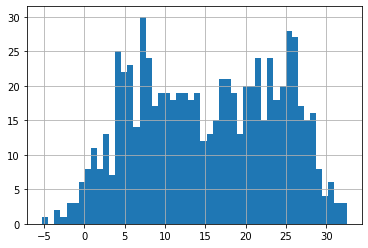

In [35]:
day_df.temp.hist(bins= 50);

In [36]:
### Now it's time to convert the teparute into levels

In [37]:
hour_df.loc[hour_df['temp'] <= 10, 'temp_level']  = 'low'

In [38]:
hour_df.loc[(hour_df['temp'] < 20) & (hour_df['temp'] > 10), 'temp_level']  = 'medium'

In [39]:
hour_df.loc[(hour_df['temp'] >= 20) & (hour_df['temp'] < 25), 'temp_level']  = 'warm'

In [40]:
hour_df.loc[hour_df['temp'] > 25, 'temp_level']  = 'high'

In [41]:
day_df.loc[day_df['temp'] <= 10, 'temp_level']  = 'low'

In [42]:
day_df.loc[(day_df['temp'] < 20) & (day_df['temp'] > 10), 'temp_level']  = 'medium'

In [43]:
day_df.loc[(day_df['temp'] >= 20) & (day_df['temp'] < 25), 'temp_level']  = 'warm'

In [44]:
day_df.loc[day_df['temp'] > 25, 'temp_level']  = 'high'

### Creating a feature to joint Registered and Casual users = variable 

In [45]:
hour_df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count',
       'is_weekend', 'temp_level'],
      dtype='object')

In [47]:
hour_df.head()

rec_id   datetime  season  year  month  hour is_holiday  weekday  \
0       1 2011-01-01  Winter     0      1     0         No        6   
1       2 2011-01-01  Winter     0      1     1         No        6   
2       3 2011-01-01  Winter     0      1     2         No        6   
3       4 2011-01-01  Winter     0      1     3         No        6   
4       5 2011-01-01  Winter     0      1     4         No        6   

   is_workingday  weather_condition  temp   atemp  humidity  windspeed  \
0              0                  1  3.28  0.2879      0.81        0.0   
1              0                  1  2.34  0.2727      0.80        0.0   
2              0                  1  2.34  0.2727      0.80        0.0   
3              0                  1  3.28  0.2879      0.75        0.0   
4              0                  1  3.28  0.2879      0.75        0.0   

   casual  registered  total_count is_weekend temp_level  
0       3          13           16        Yes        low  
1       8          32           40        Yes        low  
2       5          27           32        Yes        low  
3       3          10           13        Yes        low  
4       0           1            1        Yes        low

In [49]:
df_hour = pd.melt(hour_df, id_vars=[ 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'total_count',
       'is_weekend', 'temp_level'], value_vars=["casual", "registered"]).sort_values(by = ['datetime', 'hour']).reset_index(drop = True)

In [50]:
df_hour

datetime  season  year  month  hour is_holiday  weekday  \
0     2011-01-01  Winter     0      1     0         No        6   
1     2011-01-01  Winter     0      1     0         No        6   
2     2011-01-01  Winter     0      1     1         No        6   
3     2011-01-01  Winter     0      1     1         No        6   
4     2011-01-01  Winter     0      1     2         No        6   
...          ...     ...   ...    ...   ...        ...      ...   
34753 2012-12-31  Winter     1     12    21         No        1   
34754 2012-12-31  Winter     1     12    22         No        1   
34755 2012-12-31  Winter     1     12    22         No        1   
34756 2012-12-31  Winter     1     12    23         No        1   
34757 2012-12-31  Winter     1     12    23         No        1   

       is_workingday  weather_condition  temp   atemp  humidity  windspeed  \
0                  0                  1  3.28  0.2879      0.81     0.0000   
1                  0                  1  3.28  0.2879      0.81     0.0000   
2                  0                  1  2.34  0.2727      0.80     0.0000   
3                  0                  1  2.34  0.2727      0.80     0.0000   
4                  0                  1  2.34  0.2727      0.80     0.0000   
...              ...                ...   ...     ...       ...        ...   
34753              1                  1  4.22  0.2576      0.60     0.1642   
34754              1                  1  4.22  0.2727      0.56     0.1343   
34755              1                  1  4.22  0.2727      0.56     0.1343   
34756              1                  1  4.22  0.2727      0.65     0.1343   
34757              1                  1  4.22  0.2727      0.65     0.1343   

       total_count is_weekend temp_level    variable  value  
0               16        Yes        low      casual      3  
1               16        Yes        low  registered     13  
2               40        Yes        low      casual      8  
3               40        Yes        low  registered     32  
4               32        Yes        low      casual      5  
...            ...        ...        ...         ...    ...  
34753           90         No        low  registered     83  
34754           61         No        low      casual     13  
34755           61         No        low  registered     48  
34756           49         No        low      casual     12  
34757           49         No        low  registered     37  

[34758 rows x 18 columns]

In [52]:
df_day = pd.melt(day_df, id_vars=[ 'datetime', 'season', 'year', 'month', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'total_count',
       'is_weekend', 'temp_level'], value_vars=["casual", "registered"]).sort_values(by = ['datetime', 'datetime']).reset_index(drop = True)

In [53]:
df_day

datetime season  year  month is_holiday  weekday  is_workingday  \
0    2011-01-01      1     0      1         No        6              0   
1    2011-01-01      1     0      1         No        6              0   
2    2011-01-02      1     0      1         No        0              0   
3    2011-01-02      1     0      1         No        0              0   
4    2011-01-03      1     0      1         No        1              1   
...         ...    ...   ...    ...        ...      ...            ...   
1457 2012-12-29      1     1     12         No        6              0   
1458 2012-12-30      1     1     12         No        0              0   
1459 2012-12-30      1     1     12         No        0              0   
1460 2012-12-31      1     1     12         No        1              1   
1461 2012-12-31      1     1     12         No        1              1   

      weather_condition      temp     atemp  humidity  windspeed  total_count  \
0                     2  8.175849  0.363625  0.805833   0.160446          985   
1                     2  8.175849  0.363625  0.805833   0.160446          985   
2                     2  9.083466  0.353739  0.696087   0.248539          801   
3                     2  9.083466  0.353739  0.696087   0.248539          801   
4                     1  1.229108  0.189405  0.437273   0.248309         1349   
...                 ...       ...       ...       ...        ...          ...   
1457                  2  3.906651  0.242400  0.752917   0.124383         1341   
1458                  1  4.024151  0.231700  0.483333   0.350754         1796   
1459                  1  4.024151  0.231700  0.483333   0.350754         1796   
1460                  2  2.144151  0.223487  0.577500   0.154846         2729   
1461                  2  2.144151  0.223487  0.577500   0.154846         2729   

     is_weekend temp_level    variable  value  
0           Yes        low      casual    331  
1           Yes        low  registered    654  
2           Yes        low      casual    131  
3           Yes        low  registered    670  
4            No        low      casual    120  
...         ...        ...         ...    ...  
1457        Yes        low  registered   1182  
1458        Yes        low      casual    364  
1459        Yes        low  registered   1432  
1460         No        low      casual    439  
1461         No        low  registered   2290  

[1462 rows x 17 columns]

### Dealing with Outliers 

In [54]:
### Outlier Analysis

import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 0, 'temp_level'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature Levels')]

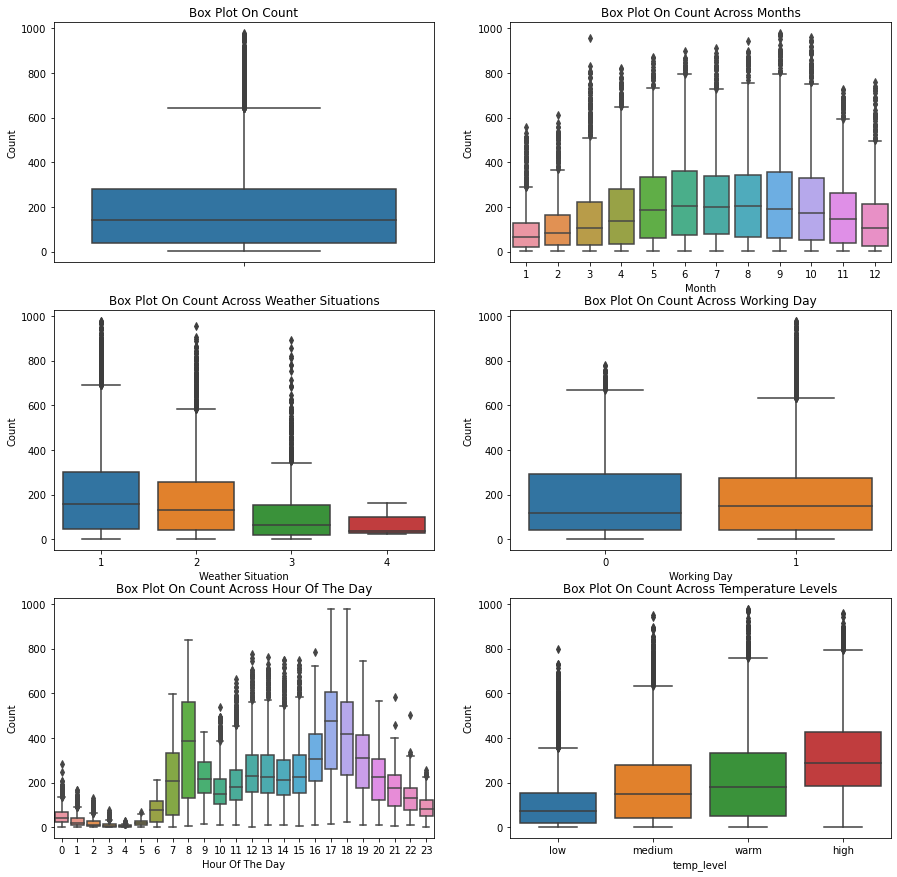

In [55]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=hour_df,y='total_count',orient="v",ax=axes[0][0])
sns.boxplot(data=hour_df,y='total_count',x="month",orient="v",ax=axes[0][1])
sns.boxplot(data=hour_df,y='total_count',x="weather_condition",orient="v",ax=axes[1][0])
sns.boxplot(data=hour_df,y='total_count',x="is_workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=hour_df,y='total_count',x="hour",orient="v",ax=axes[2][0])
sns.boxplot(data=hour_df,y='total_count',x="temp_level",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='temp_level', ylabel='Count',title="Box Plot On Count Across Temperature Levels")

In [56]:
### Interpretation: 

# The working day and holiday box plots indicate that more bicycles are rent
# during normal working days than on weekends or holidays. 

# The hourly box plots show a local maximum at 8 am and one at 5 pm which indicates
# that most users of the bicycle rental service use the bikes to get to work or school. 
    
# Another important factor seems to be the temperature. 
    
#Higher temperatures lead to an increasing number of bike rents.

#Lower temperatures not only decrease the average number of rents but also shows more outliers in the data.


### ---> We will change the temperature for group levels to see it better 

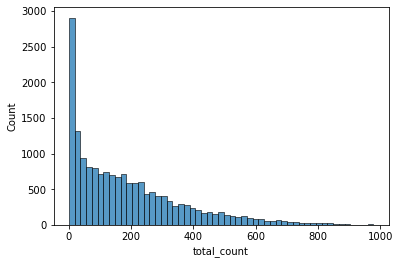

In [57]:
sns.histplot(hour_df.total_count);

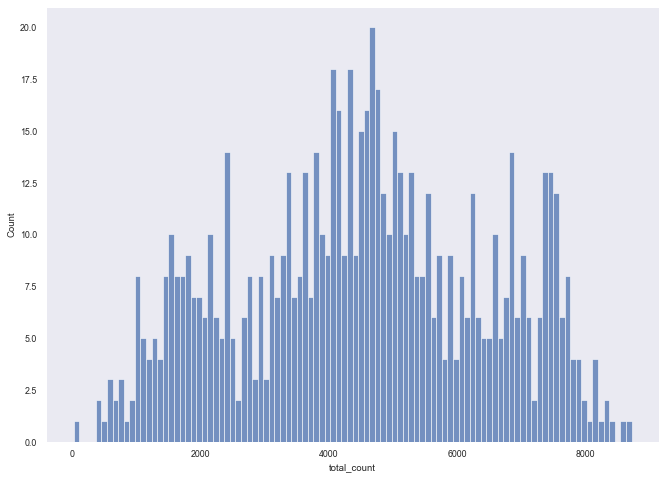

In [106]:
sns.histplot(day_df.total_count, bins = 100);

In [121]:
q1 = hour_df.total_count.quantile(0.25)
print(q1)
q3 = hour_df.total_count.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr)
print(upper_bound)
upper_bound = q3 +(1.5 * iqr)
hour_df = hour_df.loc[(hour_df.total_count >= lower_bound) & (hour_df.total_count <= upper_bound)]

37.0
592.0


In [122]:
Q1 = day_df.total_count.quantile(0.25)
Q3 = day_df.total_count.quantile(0.75)
iqr = Q3 - Q1
lower_bound = Q1 -(1.5 * iqr)
upper_bound = Q3 +(1.5 * iqr)
day_df = day_df.loc[(day_df.total_count >= lower_bound) & (day_df.total_count <= upper_bound)]

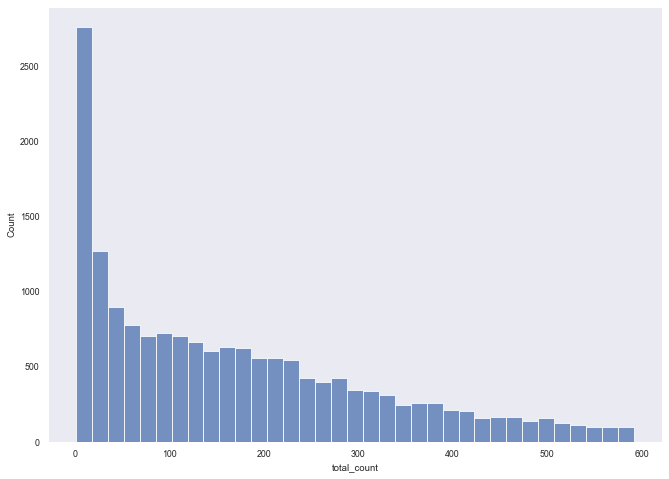

In [123]:
sns.histplot(hour_df.total_count);

In [124]:
hour_df.total_count.max()

592

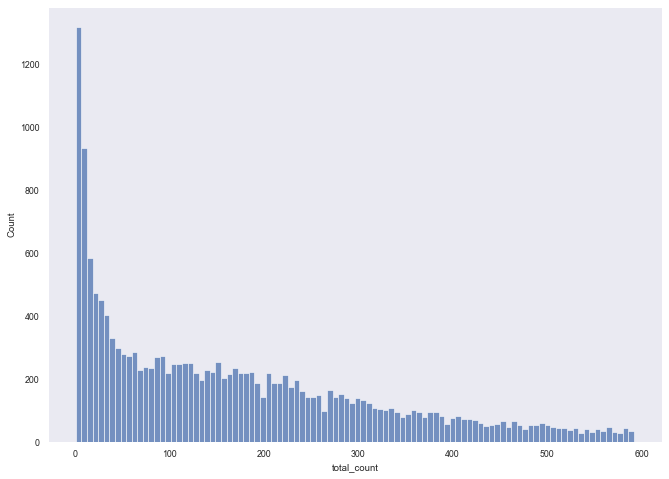

In [125]:
sns.histplot(hour_df.total_count, bins = 100);

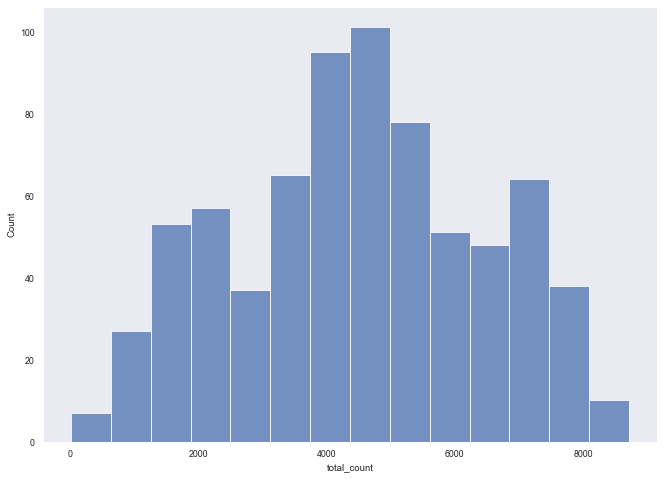

In [126]:
sns.histplot(day_df.total_count);

In [127]:
day_df.total_count.max()

8714

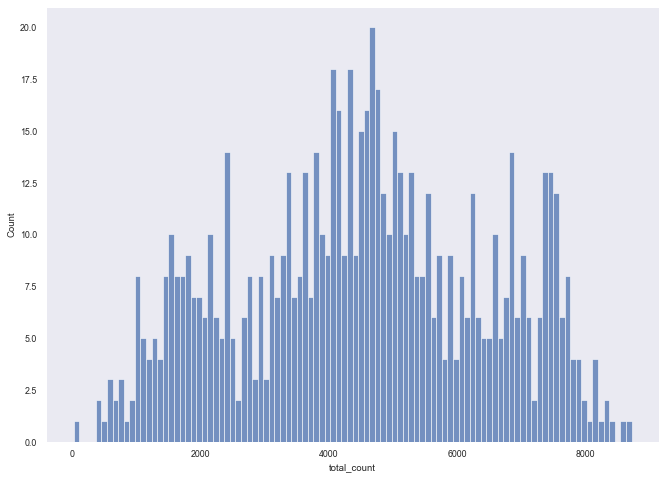

In [120]:
sns.histplot(_df.total_count, bins = 100);

### Visualization

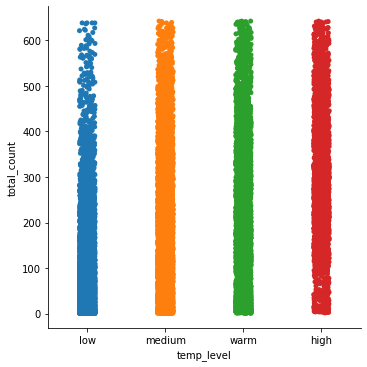

In [61]:
sns.catplot(x = 'temp_level', y = 'total_count', data = hour_df);

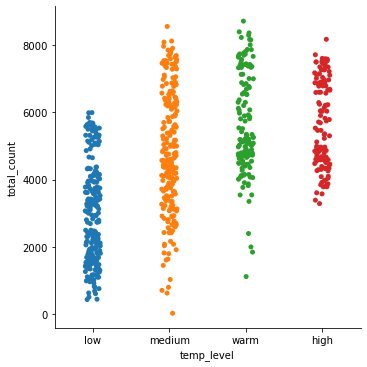

In [62]:
sns.catplot(x = 'temp_level', y = 'total_count', data = day_df);

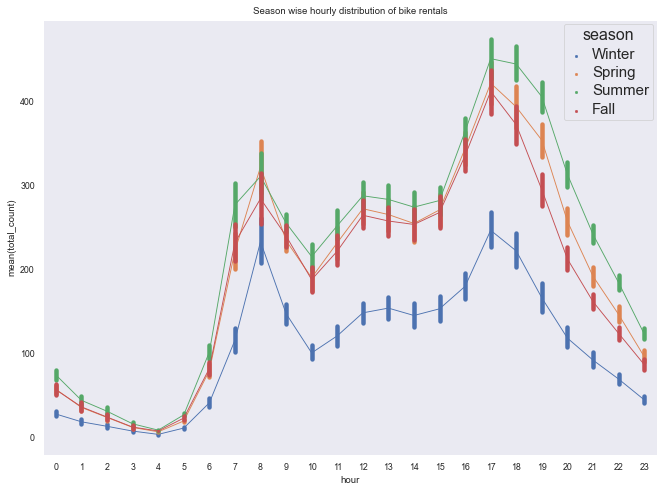

In [63]:
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})

#sns.set(style="ticks", context="talk")

#plt.style.use("dark_background")

sns.set_style("dark")

#fig, ax = plt.subplots()

ax = sns.pointplot(data = hour_df[['hour','total_count','season']], x = 'hour', y = 'total_count',
              scale = 0.2, hue = 'season');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Season wise hourly distribution of bike rentals',ylabel= 'mean(total_count)');

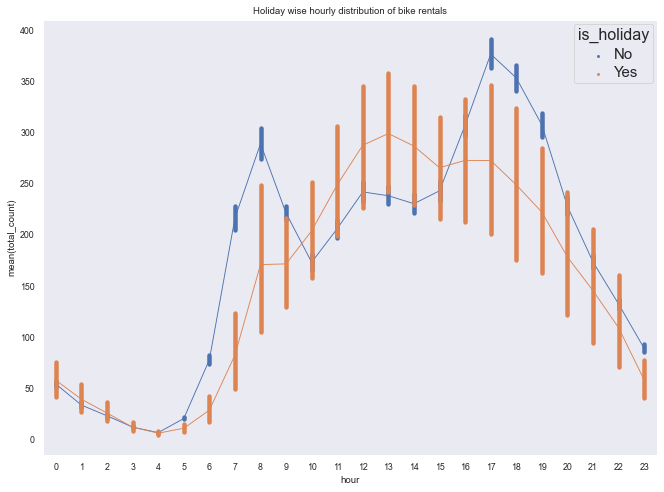

In [64]:
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})

#sns.set(style="ticks", context="talk")

#plt.style.use("dark_background")

sns.set_style("dark")

#fig, ax = plt.subplots()

ax = sns.pointplot(data = hour_df[['hour','total_count','is_holiday']], x = 'hour', y = 'total_count',
              scale = 0.2, hue = 'is_holiday');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Holiday wise hourly distribution of bike rentals',ylabel= 'mean(total_count)');

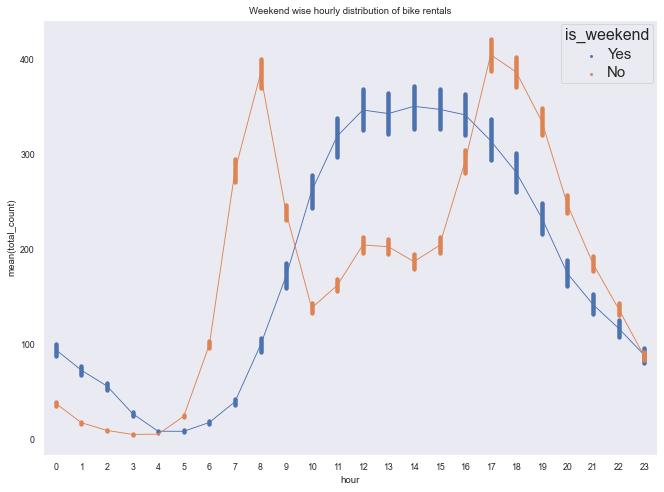

In [65]:
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})

#sns.set(style="ticks", context="talk")

#plt.style.use("dark_background")

sns.set_style("dark")

#fig, ax = plt.subplots()

ax = sns.pointplot(data = hour_df[['hour','total_count','is_weekend']], x = 'hour', y = 'total_count',
              scale = 0.2, hue = 'is_weekend');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Weekend wise hourly distribution of bike rentals',ylabel= 'mean(total_count)');

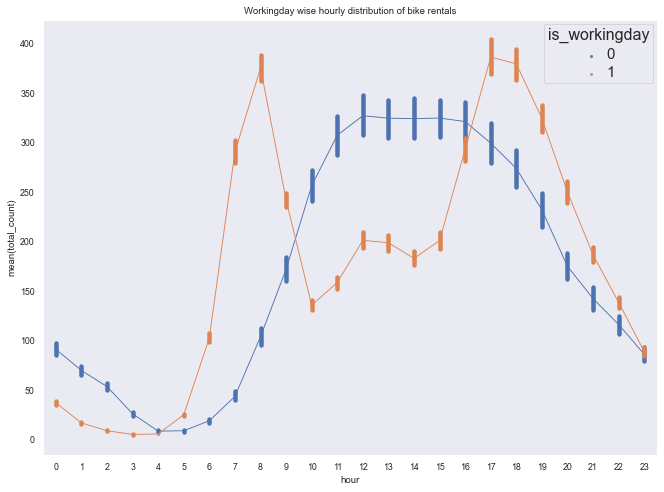

In [210]:
# workingday = 0 

sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})

#sns.set(style="ticks", context="talk")

#plt.style.use("dark_background")

sns.set_style("dark")

#fig, ax = plt.subplots()

ax = sns.pointplot(data = hour_df[['hour','total_count','is_workingday']], x = 'hour', y = 'total_count',
              scale = 0.2, hue = 'is_workingday');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Workingday wise hourly distribution of bike rentals',ylabel= 'mean(total_count)');

[Text(0.5, 1.0, 'Monthly distribution of counts')]

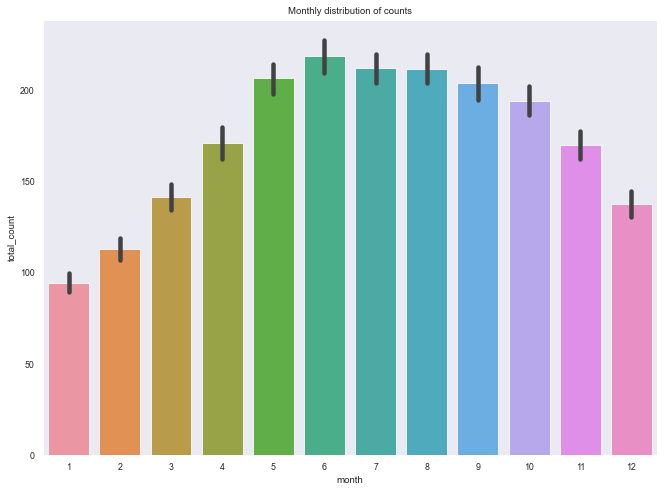

In [66]:
fig,ax = plt.subplots()

sns.barplot(data=hour_df[['month',
                           'total_count']],
              x='month',
              y='total_count',
              ax=ax)

ax.set(title="Monthly distribution of counts")

[Text(0.5, 1.0, 'Monthly distribution of counts')]

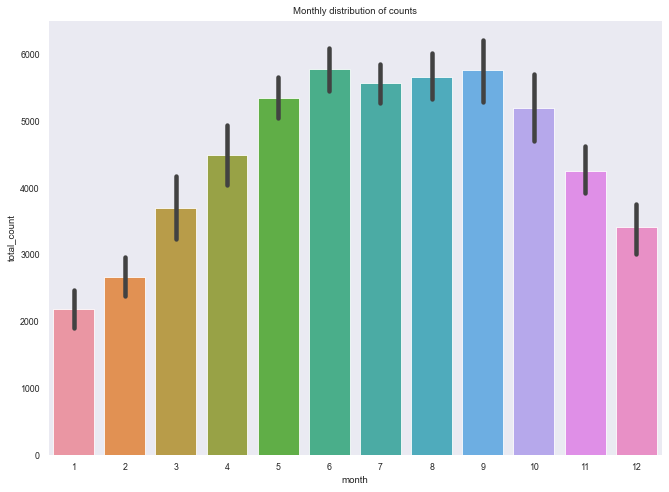

In [67]:
fig,ax = plt.subplots()

sns.barplot(data=day_df[['month',
                           'total_count']],
              x='month',
              y='total_count',
              ax=ax)

ax.set(title="Monthly distribution of counts")

[Text(0.5, 1.0, 'Seasonal distribution of counts')]

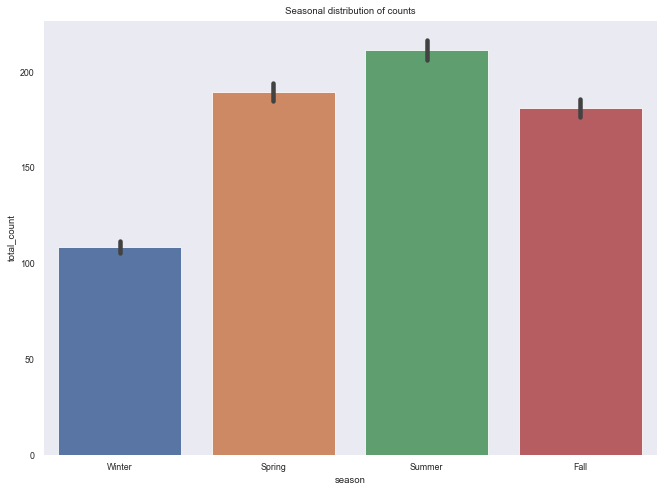

In [68]:
fig,ax = plt.subplots()

sns.barplot(data=hour_df[['season',
                           'total_count']],
              x='season',
              y='total_count',
              ax=ax)

ax.set(title="Seasonal distribution of counts")

[Text(0.5, 1.0, 'Seasonal distribution of counts')]

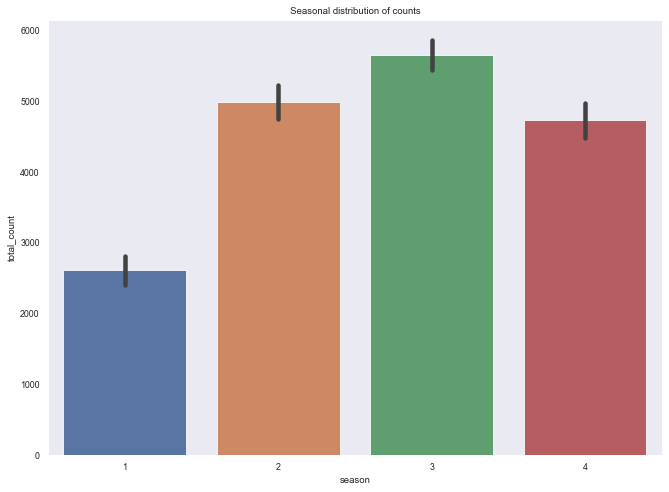

In [69]:
fig,ax = plt.subplots()

sns.barplot(data=day_df[['season',
                           'total_count']],
              x='season',
              y='total_count',
              ax=ax)

ax.set(title="Seasonal distribution of counts")

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

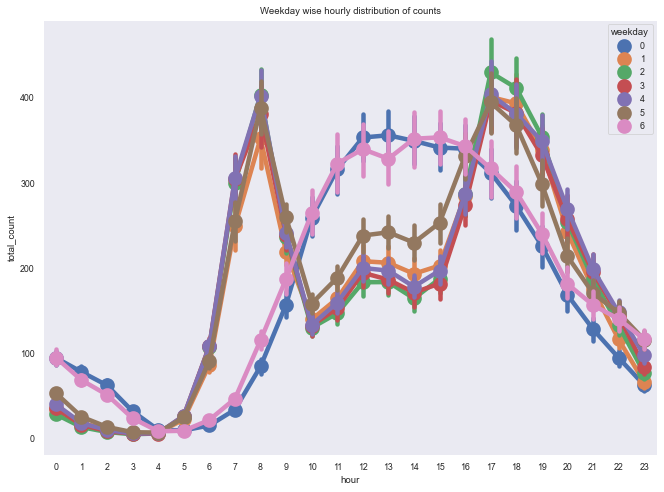

In [70]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'total_count',
                           'weekday']],
              x='hour',
              y='total_count',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

<AxesSubplot:>

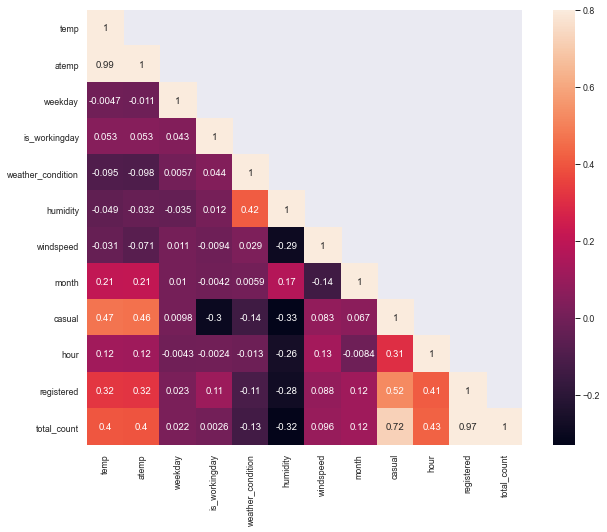

In [212]:
# datetime', 'season', 'year', 'month', 'is_holiday',
 #       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
  #       'humidity', 'windspeed', 'total_count'

corrMatt = hour_df[['temp',
                    'atemp', 
                    'is_holiday',
                    'weekday',
                    'is_workingday',
                    'weather_condition',
                    'humidity', 
                    'windspeed', 
                    'temp_level',
                    'season', 
                    'month',
                    'casual', 
                    'hour',
                    'registered', 
                    'total_count']].corr()

mask = np.array(corrMatt)
# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

<AxesSubplot:>

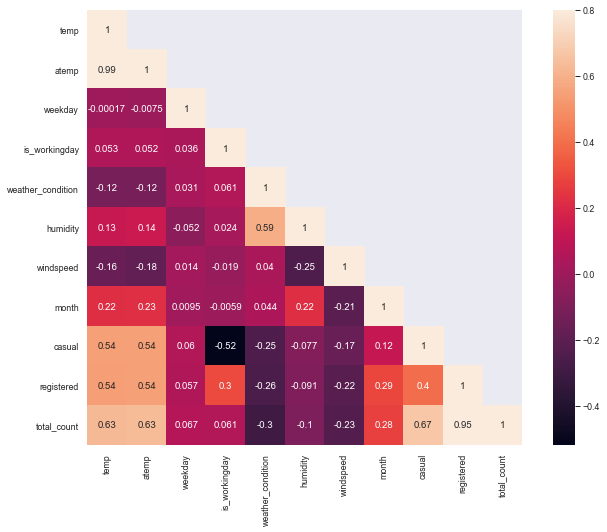

In [214]:
corrMatt = day_df[['temp',
                    'atemp', 
                    'is_holiday',
                    'weekday',
                    'is_workingday',
                    'weather_condition',
                    'humidity', 
                    'windspeed', 
                    'temp_level',
                    'season', 
                    'month',
                    'casual', 
                    'registered', 
                    'total_count']].corr()

mask = np.array(corrMatt)
# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

<AxesSubplot:ylabel='total_count'>

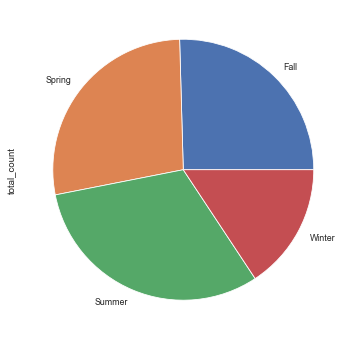

In [73]:
plt.figure(figsize=(6,6))
hour_df.groupby(["season"])["total_count"].sum().plot.pie()

<AxesSubplot:ylabel='total_count'>

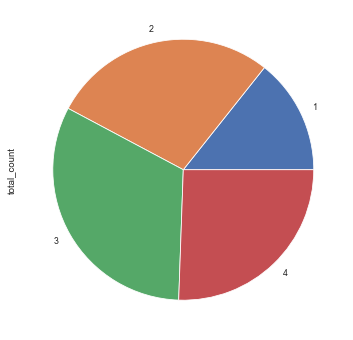

In [74]:
plt.figure(figsize=(6,6))
day_df.groupby(["season"])["total_count"].sum().plot.pie()

<AxesSubplot:ylabel='total_count'>

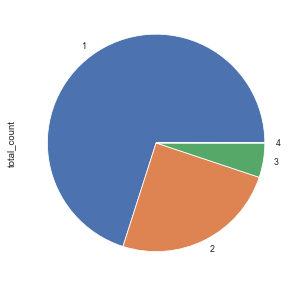

In [76]:
plt.figure(figsize=(5,5))
hour_df.groupby(["weather_condition"])["total_count"].sum().plot.pie()

<AxesSubplot:ylabel='total_count'>

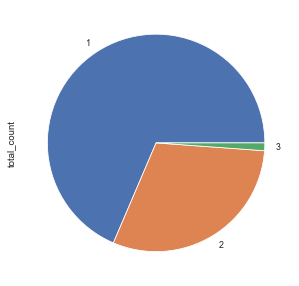

In [75]:
plt.figure(figsize=(5,5))
day_df.groupby(["weather_condition"])["total_count"].sum().plot.pie()

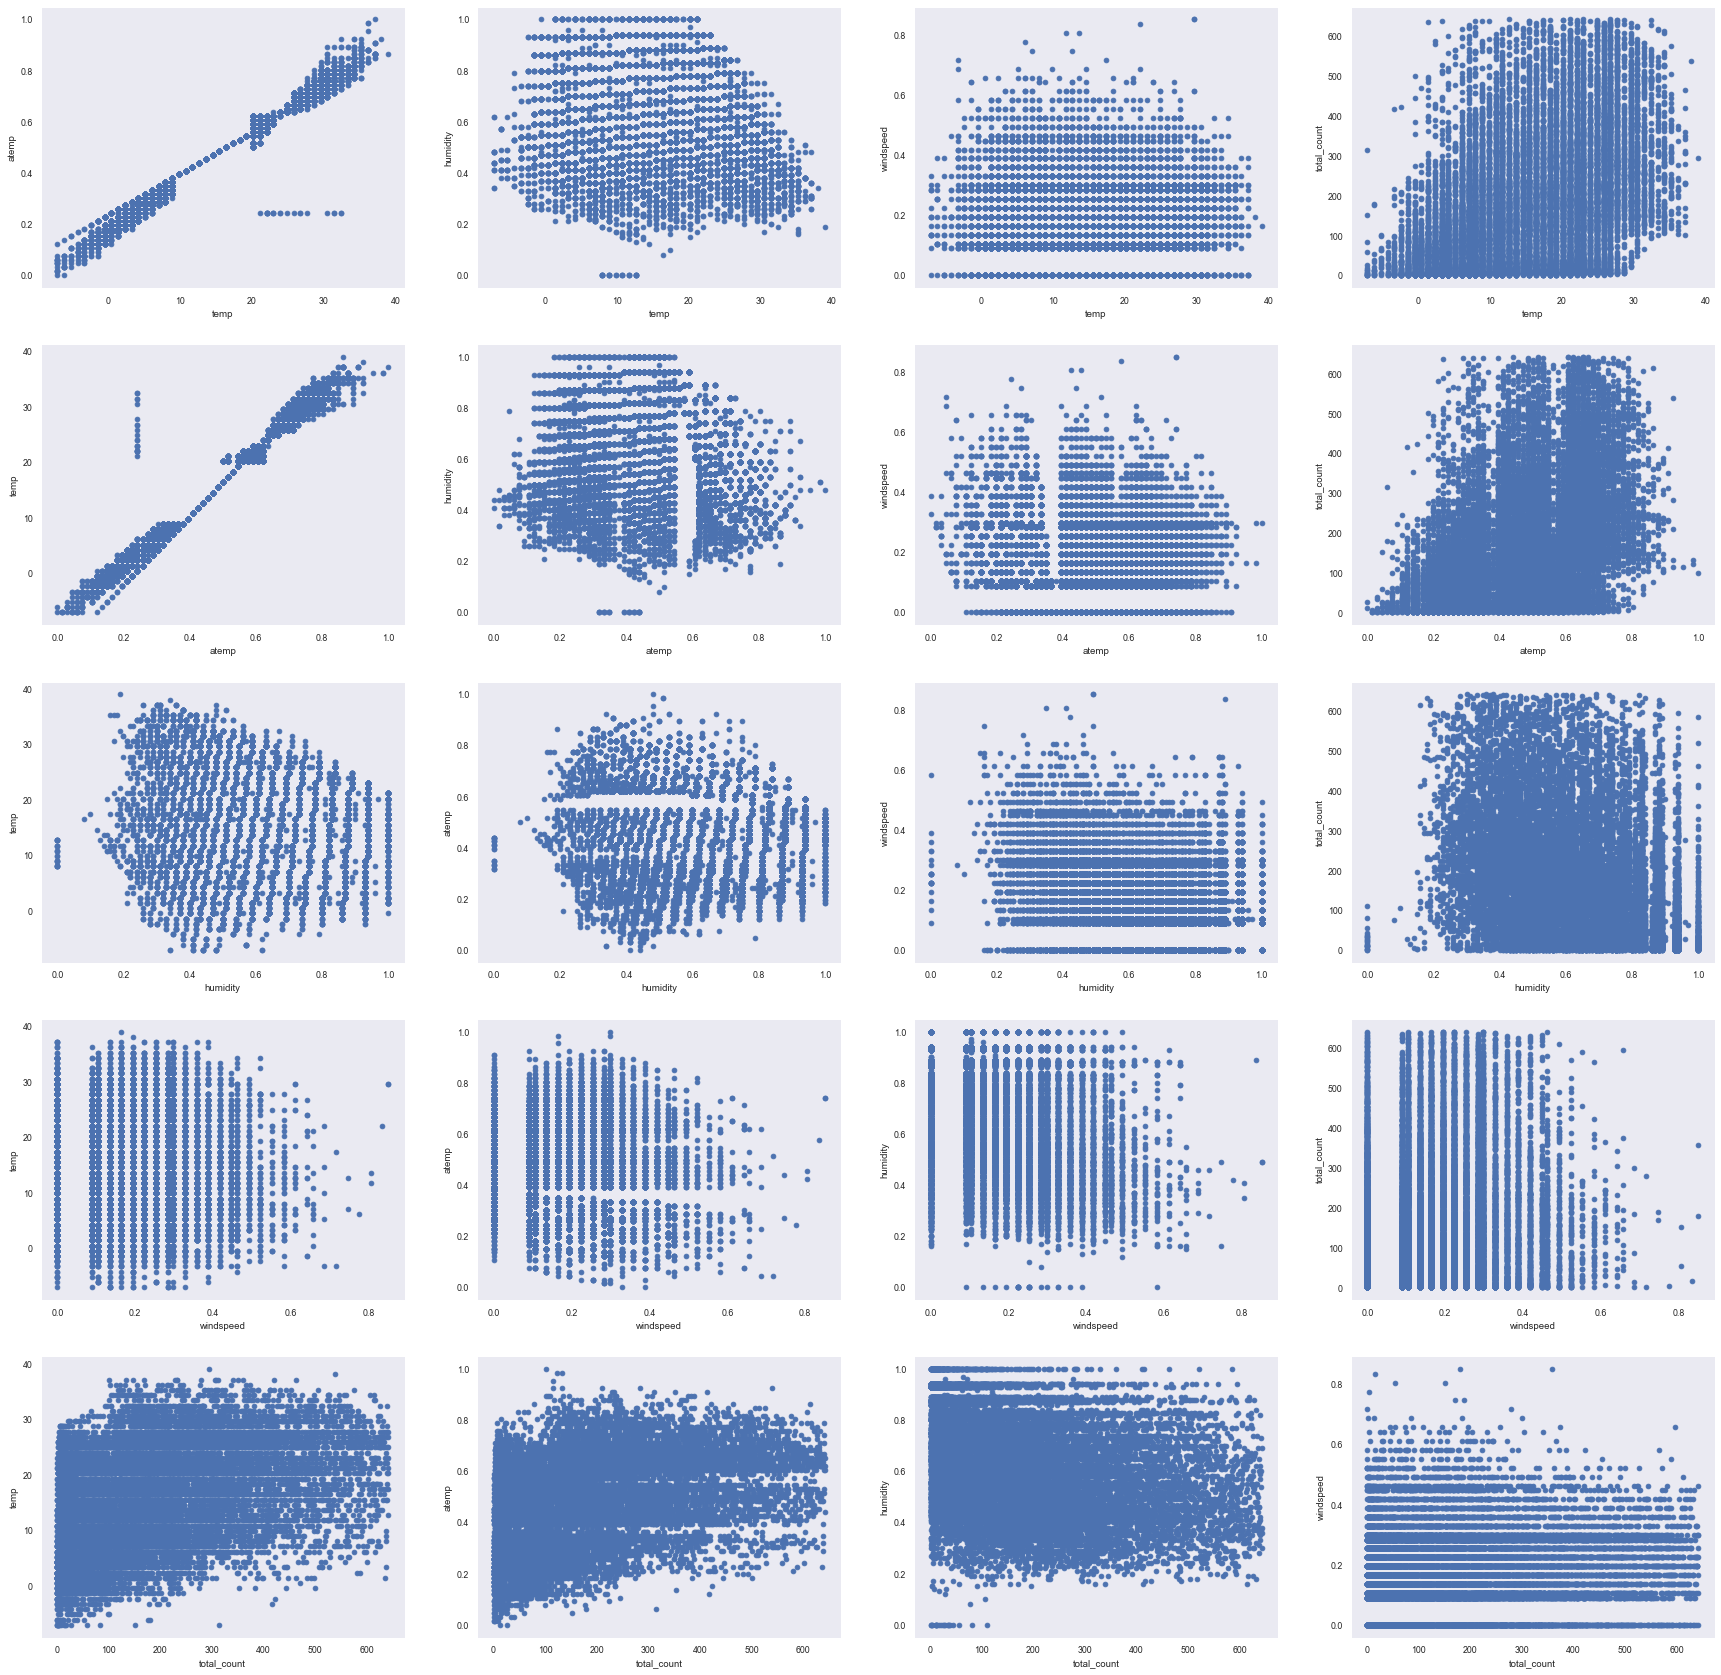

In [77]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(30,30))

columns = ['temp', 'atemp', 'humidity', 'windspeed', 'total_count']

ax= axes.flatten()

idx = 0
for i, val1 in enumerate(columns):
  for j, val2 in enumerate(columns):
    if val1!=val2:
        ax[idx].scatter(hour_df[val1], hour_df[val2])
        ax[idx].set_xlabel(val1)
        ax[idx].set_ylabel(val2)
        idx+=1

plt.show()

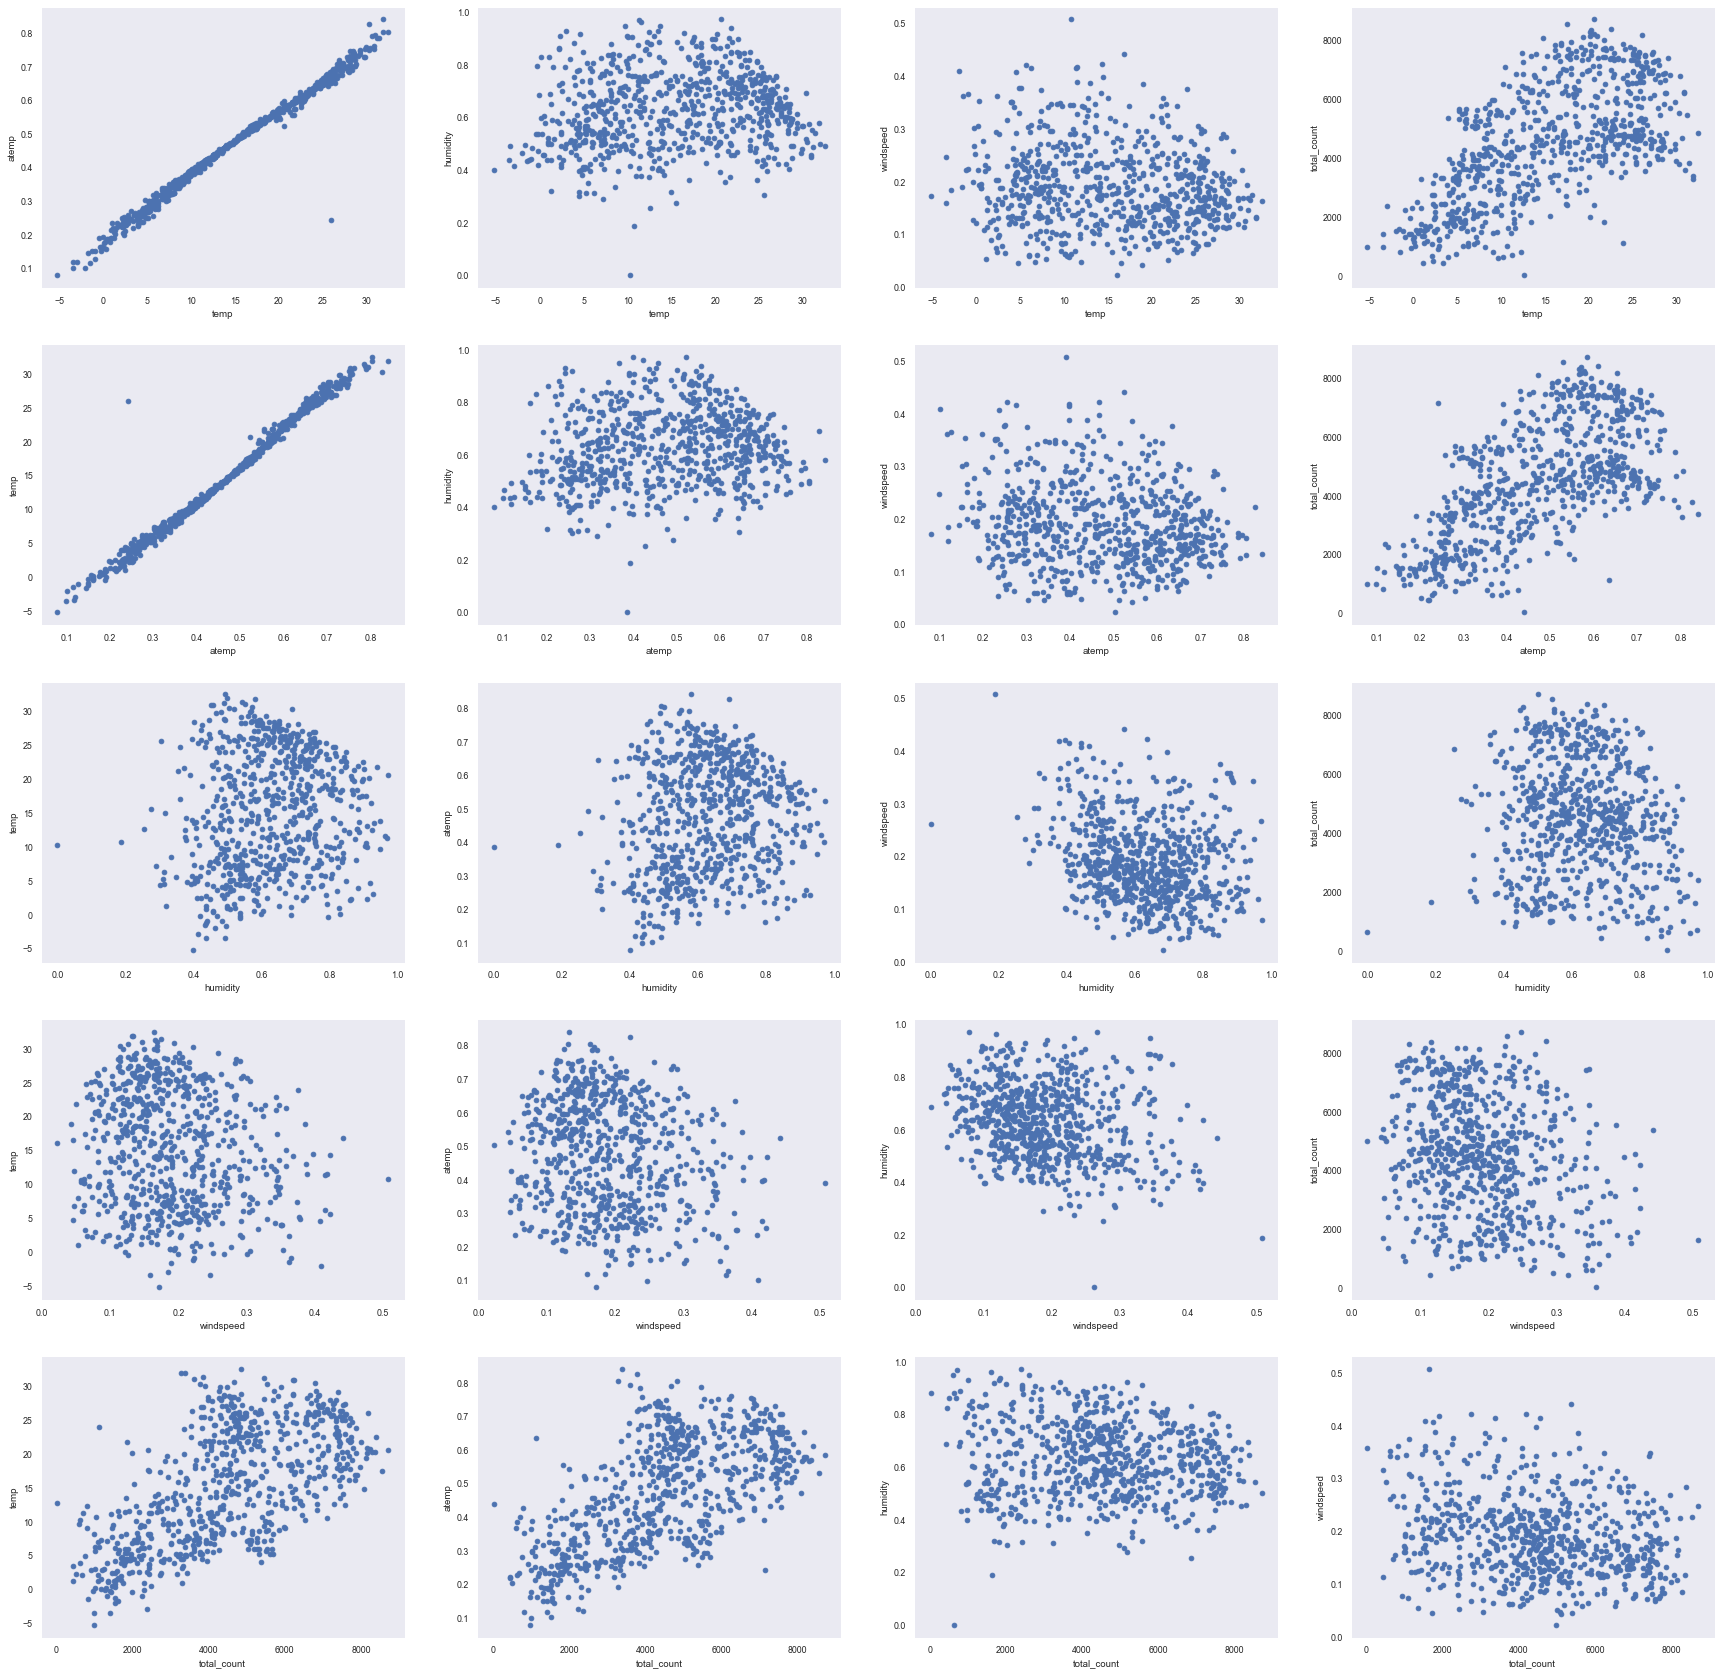

In [79]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(30,30))

columns = ['temp', 'atemp', 'humidity', 'windspeed', 'total_count']

ax= axes.flatten()

idx = 0
for i, val1 in enumerate(columns):
  for j, val2 in enumerate(columns):
    if val1!=val2:
        ax[idx].scatter(day_df[val1], day_df[val2])
        ax[idx].set_xlabel(val1)
        ax[idx].set_ylabel(val2)
        idx+=1

plt.show()

In [80]:
hour_df.atemp = hour_df.atemp*47 - 8 # Converting A.temperature to Celsius

/Users/brunobernardo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Average counts')

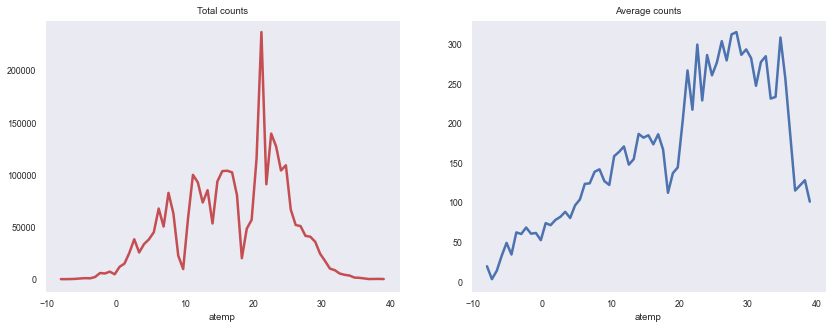

In [81]:
plt.figure(figsize= (14,5))

plt.subplot(1,2,1)
hour_df.groupby("atemp")["total_count"].sum().plot(color="r")
plt.title("Total counts")

plt.subplot(1,2,2)
hour_df.groupby("atemp")["total_count"].mean().plot(color="b")
plt.title("Average counts")

Text(0.5, 1.0, 'Average counts')

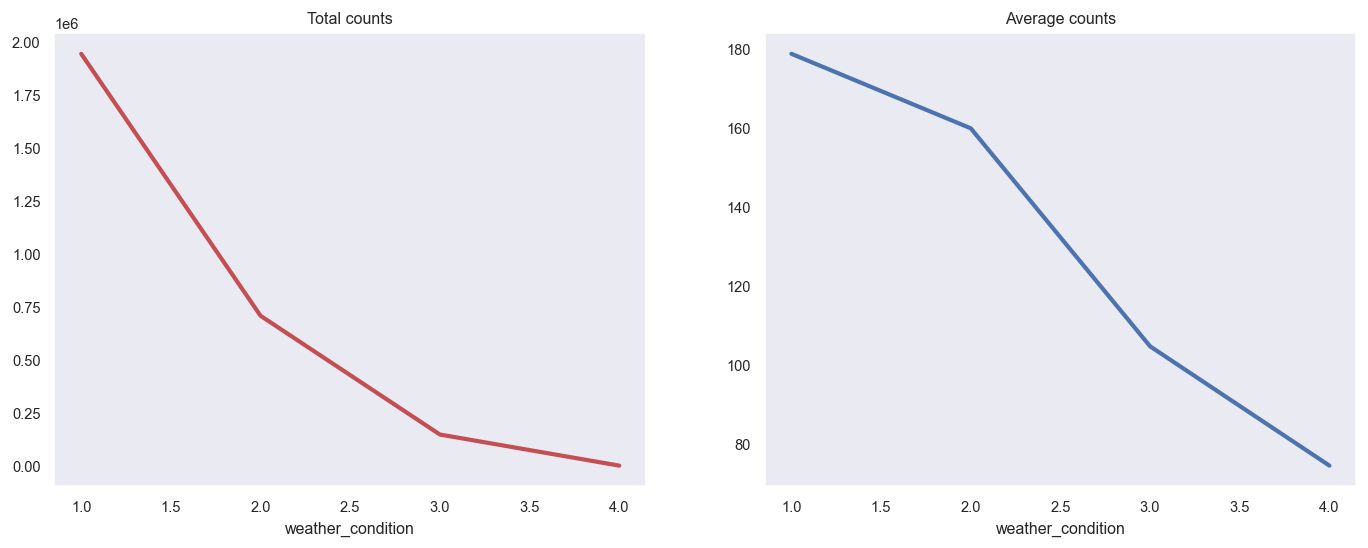

In [274]:
plt.figure(figsize= (14,5))

plt.subplot(1,2,1)
hour_df.groupby("weather_condition")["total_count"].sum().plot(color="r")
plt.title("Total counts")

plt.subplot(1,2,2)
hour_df.groupby("weather_condition")["total_count"].mean().plot(color="b")
plt.title("Average counts")

Text(0.5, 1.0, 'Average counts')

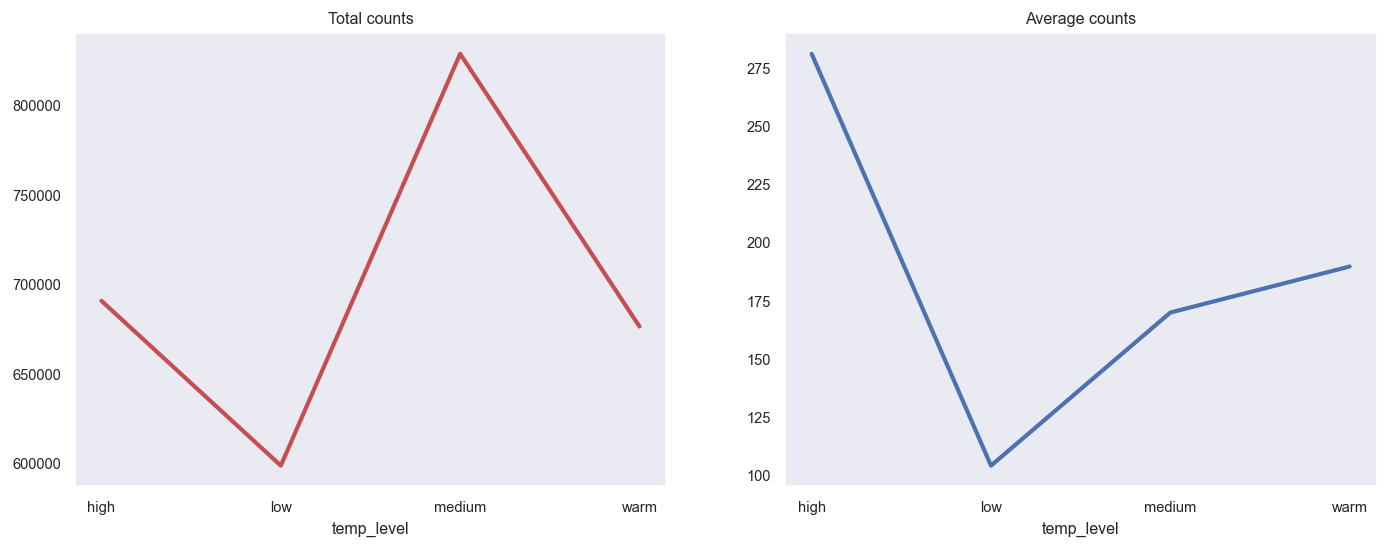

In [275]:
plt.figure(figsize= (14,5))

plt.subplot(1,2,1)
hour_df.groupby("temp_level")["total_count"].sum().plot(color="r")
plt.title("Total counts")

plt.subplot(1,2,2)
hour_df.groupby("temp_level")["total_count"].mean().plot(color="b")
plt.title("Average counts")

In [90]:
day_df.atemp = day_df.atemp*47 - 8 # Converting A.temperature to Celsius

Text(0.5, 1.0, 'Average counts')

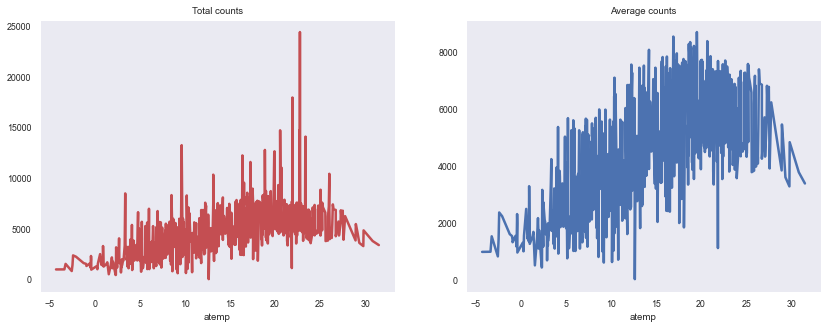

In [91]:
plt.figure(figsize= (14,5))

plt.subplot(1,2,1)
day_df.groupby("atemp")["total_count"].sum().plot(color="r")
plt.title("Total counts")

plt.subplot(1,2,2)
day_df.groupby("atemp")["total_count"].mean().plot(color="b")
plt.title("Average counts")

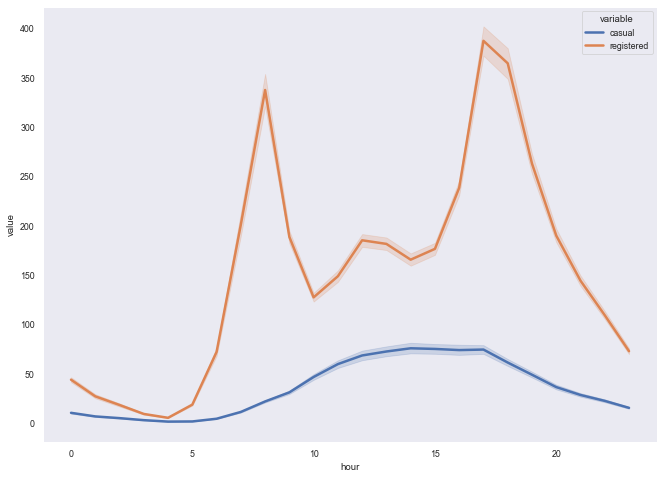

In [84]:
sns.lineplot(x = 'hour', y = 'value', data = df_hour, hue = 'variable');

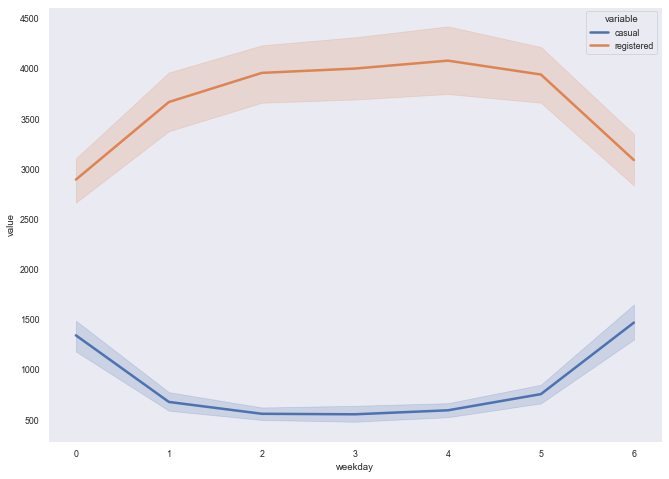

In [216]:
sns.lineplot(x = 'weekday', y = 'value', data = df_day, hue = 'variable');

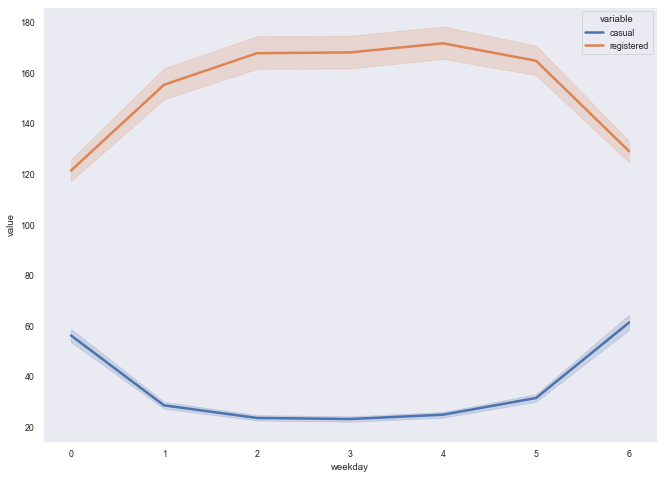

In [200]:
sns.lineplot(x = 'weekday', y = 'value', data = df_hour, hue = 'variable');

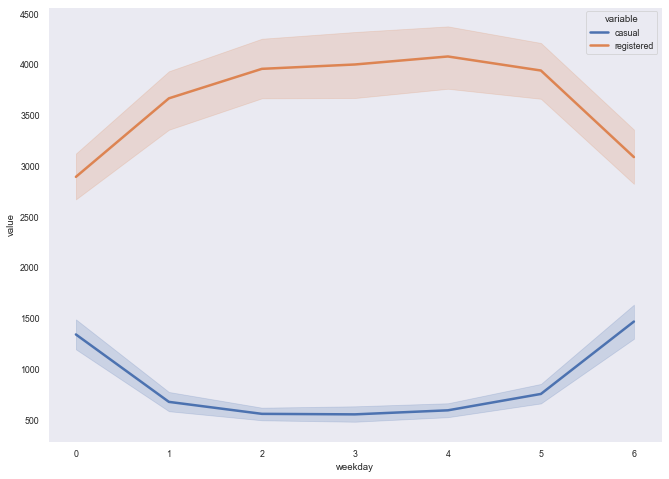

In [201]:
sns.lineplot(x = 'weekday', y = 'value', data = df_day, hue = 'variable');

In [ ]:
sns.lineplot(x = '', y = 'total_count', data = df_hour, hue = 'variable');

In [85]:
df_hour_month = df_hour.groupby(['variable', 'month'])['value'].sum().reset_index()
df_hour_month

variable  month   value
0       casual      1   12042
1       casual      2   14963
2       casual      3   44444
3       casual      4   60802
4       casual      5   75285
5       casual      6   73906
6       casual      7   78157
7       casual      8   72039
8       casual      9   70323
9       casual     10   59760
10      casual     11   36603
11      casual     12   21693
12  registered      1  122891
13  registered      2  136389
14  registered      3  184476
15  registered      4  208292
16  registered      5  256401
17  registered      6  272436
18  registered      7  266791
19  registered      8  279155
20  registered      9  275668
21  registered     10  262592
22  registered     11  218228
23  registered     12  189343

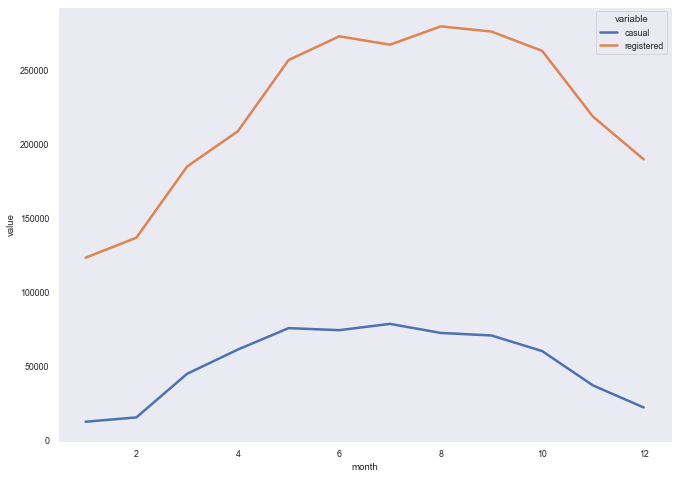

In [86]:
sns.lineplot(x = 'month', y = 'value', data = df_hour_month, hue = 'variable');

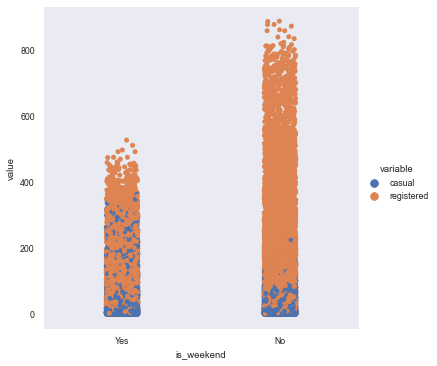

In [87]:
sns.catplot(x = 'is_weekend', y = 'value', data = df_hour, hue = 'variable');

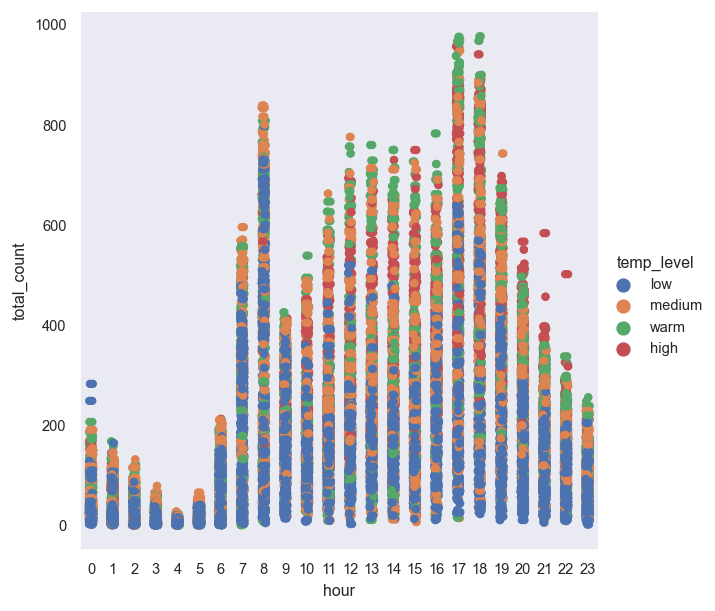

In [240]:
sns.catplot(x = 'hour', y = 'total_count', data = df_hour, hue = 'temp_level');

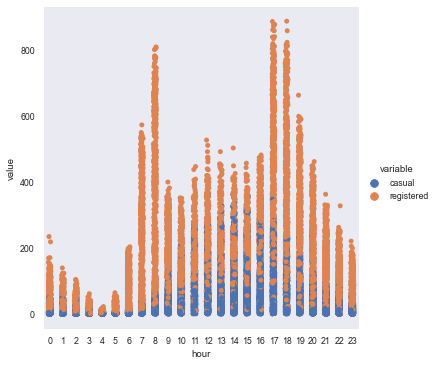

In [217]:
sns.catplot(x = 'hour', y = 'value', data = df_hour, hue = 'variable');

### Adding Pollution dataset

In [92]:
pollution_df = pd.read_csv('pollution.csv')

In [93]:
pollution_df.head()

Unnamed: 0      dteday    yr  mnth  weekday  aqi_label  aqi_reading
0           0  2011-01-01  2011     1        5          3          111
1           1  2011-01-02  2011     1        6          1           46
2           2  2011-01-03  2011     1        0          1           39
3           3  2011-01-04  2011     1        1          2           70
4           4  2011-01-05  2011     1        2          2           57

In [197]:
pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   731 non-null    int64 
 1   dteday       731 non-null    object
 2   yr           731 non-null    int64 
 3   mnth         731 non-null    int64 
 4   weekday      731 non-null    int64 
 5   aqi_label    731 non-null    int64 
 6   aqi_reading  731 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 40.1+ KB


In [245]:
pollution_df1 = pd.read_csv('day-pollution.csv')

In [246]:
pollution_df1.head()

Unnamed: 0  instant      dteday  season  yr  mnth  holiday  weekday  \
0           0        1  2011-01-01       1   0     1        0        6   
1           1        2  2011-01-02       1   0     1        0        0   
2           2        3  2011-01-03       1   0     1        0        1   
3           3        4  2011-01-04       1   0     1        0        2   
4           4        5  2011-01-05       1   0     1        0        3   

   workingday  weathersit      temp     atemp       hum  windspeed  casual  \
0           0           2  0.344167  0.363625  0.805833   0.160446     331   
1           0           2  0.363478  0.353739  0.696087   0.248539     131   
2           1           1  0.196364  0.189405  0.437273   0.248309     120   
3           1           1  0.200000  0.212122  0.590435   0.160296     108   
4           1           1  0.226957  0.229270  0.436957   0.186900      82   

   registered   cnt  aqi_label  aqi_reading  
0         654   985          3          111  
1         670   801          1           46  
2        1229  1349          1           39  
3        1454  1562          2           70  
4        1518  1600          2           57

In [254]:
pollution_df1.loc[(pollution_df1['aqi_reading'] >= 0) & (pollution_df1['aqi_reading'] < 50), 'aqi_level']  = 'good'# 0 - 50
pollution_df1.loc[(pollution_df1['aqi_reading'] >= 51) & (pollution_df1['aqi_reading'] < 100), 'aqi_level']  = 'moderate'# 51-100
pollution_df1.loc[(pollution_df1['aqi_reading'] >= 101) & (pollution_df1['aqi_reading'] < 150), 'aqi_level'] = 'unhealthy for sensitive'# 101-150
pollution_df1.loc[(pollution_df1['aqi_reading'] >= 151) & (pollution_df1['aqi_reading'] < 200), 'aqi_level'] = 'unhealthy' # 151-200
pollution_df1.loc[pollution_df1['aqi_reading'] > 201, 'aqi_level']  = 'very unhealthy'# 201-300
                        

In [255]:
pollution_df1.head()

Unnamed: 0  instant      dteday  season  yr  mnth  holiday  weekday  \
0           0        1  2011-01-01       1   0     1        0        6   
1           1        2  2011-01-02       1   0     1        0        0   
2           2        3  2011-01-03       1   0     1        0        1   
3           3        4  2011-01-04       1   0     1        0        2   
4           4        5  2011-01-05       1   0     1        0        3   

   workingday  weathersit      temp     atemp       hum  windspeed  casual  \
0           0           2  0.344167  0.363625  0.805833   0.160446     331   
1           0           2  0.363478  0.353739  0.696087   0.248539     131   
2           1           1  0.196364  0.189405  0.437273   0.248309     120   
3           1           1  0.200000  0.212122  0.590435   0.160296     108   
4           1           1  0.226957  0.229270  0.436957   0.186900      82   

   registered   cnt  aqi_label  aqi_reading                aqi_level  
0         654   985          3          111  unhealthy for sensitive  
1         670   801          1           46                     good  
2        1229  1349          1           39                     good  
3        1454  1562          2           70                 moderate  
4        1518  1600          2           57                 moderate

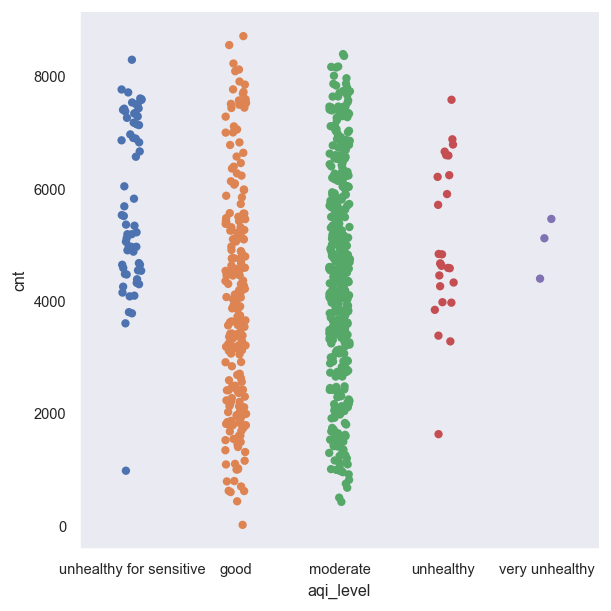

In [288]:
# Total_bikes by Pollution - Line Plot

sns.catplot(x = 'aqi_level', y = 'cnt', data = pollution_df1);

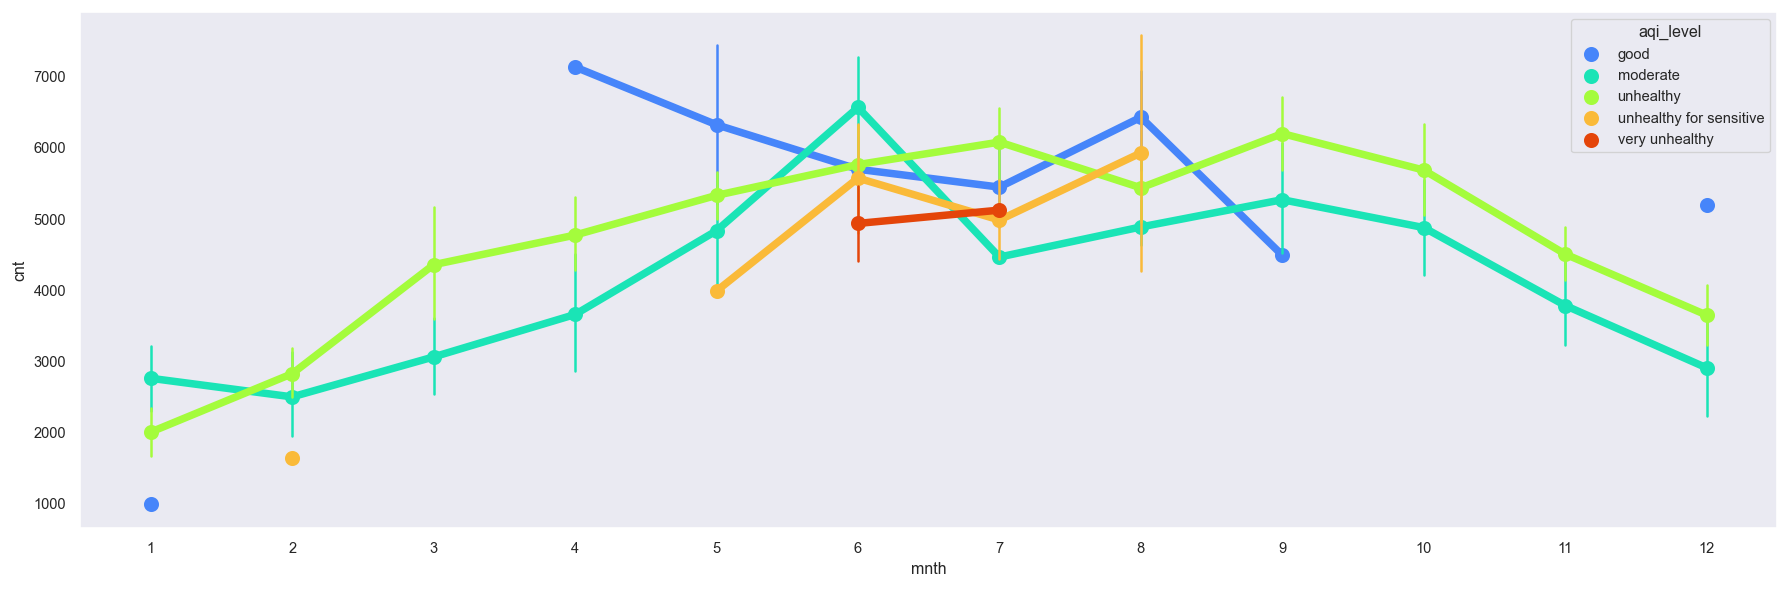

In [298]:
plt.figure(figsize=(15,5))
g = sns.pointplot(y = pollution_df1.cnt,
             x = pollution_df1.mnth,
             hue = pollution_df1.aqi_level,
             palette = 'turbo',
             markers='.',
             errwidth = 1.5)
g_legend = g.axes.get_legend()
g_labels = ['good', 'moderate', 'unhealthy', 'unhealthy for sensitive', 'very unhealthy']
for t, l in zip(g_legend.texts, g_labels): t.set_text(l)
# plt.axhline(hours_df.total_bikes.mean()+0.315*hours_df.total_bikes.mean(), color='orange')
plt.tight_layout()

### Working with the Peak Hours - Visualization

In [88]:
# MONDAY - FRIDAY     # Weekend - No peak/rush

# AM Rush
# 5am - 9:30am        # https://www.wmata.com/fares/basic.cfm

# PM Rush
# 3pm - 7pm

In [89]:
# District of Columbia Court - Hours of Operation - https://www.dcd.uscourts.gov

# Monday - Friday
# 9:00 a.m. to 4:00 p.m.

# In general, federal building hours of operation are from 7:30 a.m. to 5:00 p.m.

# https://www.gsa.gov/about-us/regions/welcome-to-the-national-capital-region-11/buildings-and-facilities/visiting-or-working-in-federal-buildings

In [94]:
hour_df.head()

rec_id   datetime  season  year  month  hour is_holiday  weekday  \
0       1 2011-01-01  Winter     0      1     0         No        6   
1       2 2011-01-01  Winter     0      1     1         No        6   
2       3 2011-01-01  Winter     0      1     2         No        6   
3       4 2011-01-01  Winter     0      1     3         No        6   
4       5 2011-01-01  Winter     0      1     4         No        6   

   is_workingday  weather_condition  temp   atemp  humidity  windspeed  \
0              0                  1  3.28  5.5313      0.81        0.0   
1              0                  1  2.34  4.8169      0.80        0.0   
2              0                  1  2.34  4.8169      0.80        0.0   
3              0                  1  3.28  5.5313      0.75        0.0   
4              0                  1  3.28  5.5313      0.75        0.0   

   casual  registered  total_count is_weekend temp_level  
0       3          13           16        Yes        low  
1       8          32           40        Yes        low  
2       5          27           32        Yes        low  
3       3          10           13        Yes        low  
4       0           1            1        Yes        low

In [140]:
#import unittest

from nose.tools import *

import time

import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm, skew, kurtosis
import matplotlib.pyplot as plt

In [141]:
hour_df_non_weekend = hour_df[hour_df['is_weekend'] == 0]
hour_df_non_weekend = hour_df_non_weekend.drop(['is_holiday','is_weekend'],axis=1)
hour_df_is_weekend = hour_df[hour_df['is_weekend'] == 1]
hour_df_is_weekend = hour_df_is_weekend.drop(['is_holiday','is_weekend'],axis=1)
hour_df_is_holiday = hour_df[hour_df['is_holiday'] == 1]
hour_df_is_holiday = hour_df_is_holiday.drop(['is_holiday','is_weekend'],axis=1)
hour_df_non_holiday = hour_df[hour_df['is_holiday'] == 0]
hour_df_non_holiday = hour_df_non_holiday.drop(['is_holiday','is_weekend'],axis=1)

In [154]:
hour_df.head()

rec_id   datetime  season  year  month  hour is_holiday  weekday  \
0       1 2011-01-01  Winter     0      1     0         No        6   
1       2 2011-01-01  Winter     0      1     1         No        6   
2       3 2011-01-01  Winter     0      1     2         No        6   
3       4 2011-01-01  Winter     0      1     3         No        6   
4       5 2011-01-01  Winter     0      1     4         No        6   

   is_workingday  weather_condition  temp   atemp  humidity  windspeed  \
0              0                  1  3.28  5.5313      0.81        0.0   
1              0                  1  2.34  4.8169      0.80        0.0   
2              0                  1  2.34  4.8169      0.80        0.0   
3              0                  1  3.28  5.5313      0.75        0.0   
4              0                  1  3.28  5.5313      0.75        0.0   

   casual  registered  total_count is_weekend temp_level  
0       3          13           16        Yes        low  
1       8          32           40        Yes        low  
2       5          27           32        Yes        low  
3       3          10           13        Yes        low  
4       0           1            1        Yes        low

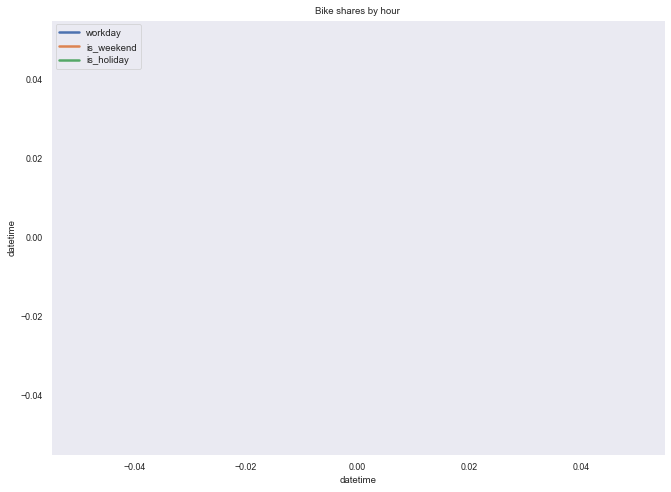

In [157]:
def hourly_plot(hour_df,title):
   

    """
    Function for plotting bike shares by hour.
    input: 
    df - pandas dataframe 
    title - main title of the plot
    
    """
    assert_true('datetime' in set(hour_df.columns))
    assert_true('total_count' in set(hour_df.columns))
    hour_df.groupby(by=hour_df.datetime.dt.hour)['total_count'].mean().plot()
    plt.title(title)
    plt.ylabel('datetime')
    plt.legend(['workday','is_weekend','is_holiday'],loc=2, fontsize = 'medium')
    
hourly_plot(hour_df_non_weekend, 'Bike shares by hour')
hourly_plot(hour_df_is_weekend, 'Bike shares by hour')
hourly_plot(hour_df_is_holiday, 'Bike shares by hour')

### Bike sharing utilization over the two years

Text(0.5, 1.0, 'Bike sharing utilization over the two years')

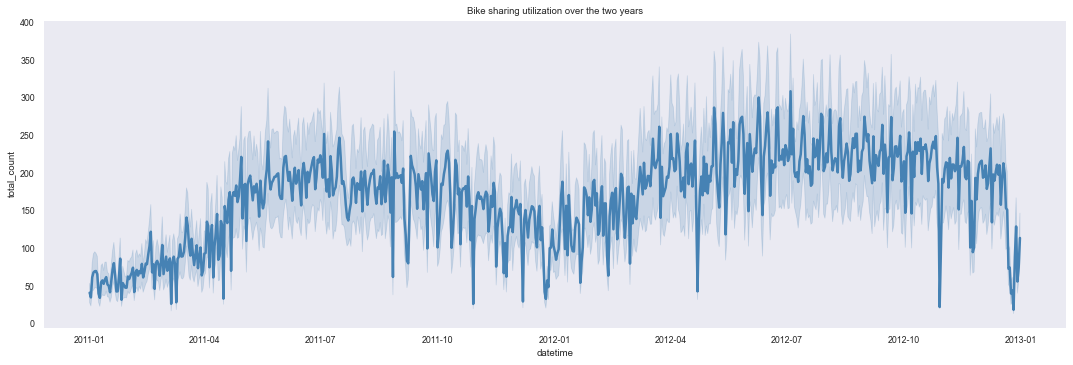

In [159]:


plt.figure(figsize=(15,5))
sns.lineplot(x = hour_df.datetime,
             y = hour_df.total_count,
             color = 'steelblue')
plt.tight_layout()
plt.title('Bike sharing utilization over the two years')

In [ ]:
# Based on the two years dataset, 
 # it seems that the utilization of the bike sharing service has increased over the period. 
  # The number of bikes rented per day also seems to vary depending on the season, 
   # with Spring and Summer months being showing a higher utilization of the service.

### Total_bikes by Month - Line Plot

<ipython-input-161-cf6a61abeab4>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g = sns.lineplot(x = hour_df.month,


Text(0.5, 1.0, 'Bike sharing utilization by Month')

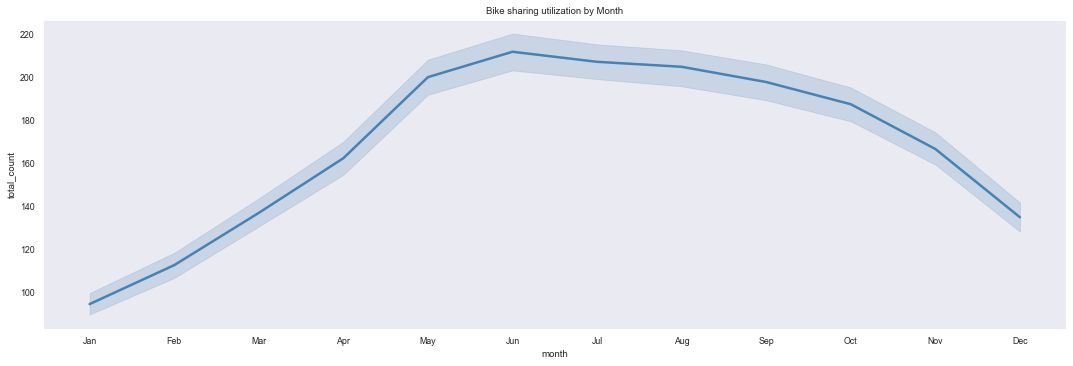

In [161]:
# Total_bikes by Month - Line Plot

plt.figure(figsize=(15,5))
g = sns.lineplot(x = hour_df.month,
             y = hour_df.total_count,
             color = 'steelblue') \
   .axes.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.tight_layout()
plt.title('Bike sharing utilization by Month')

### Total_bikes by Month - Box Plot

Text(0.5, 1.0, 'Total count of bikes by Month - Box Plot')

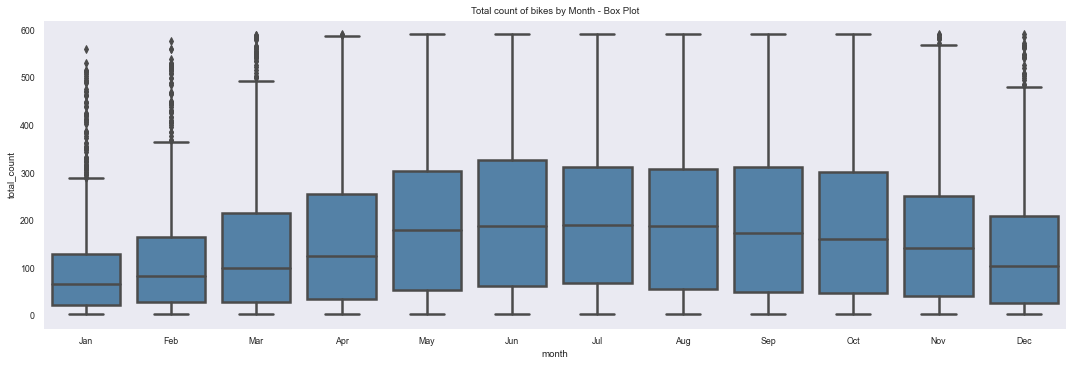

In [164]:
# Total_bikes by Month - Box Plot

plt.figure(figsize=(15,5))
sns.boxplot(x = hour_df.month,
            y = hour_df.total_count,
             color = 'steelblue') \
   .axes.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.title('Total count of bikes by Month - Box Plot')

### Total_bikes by Hour - Line Plot

Text(0.5, 1.0, 'Total count of bikes by Hour - Line Plot')

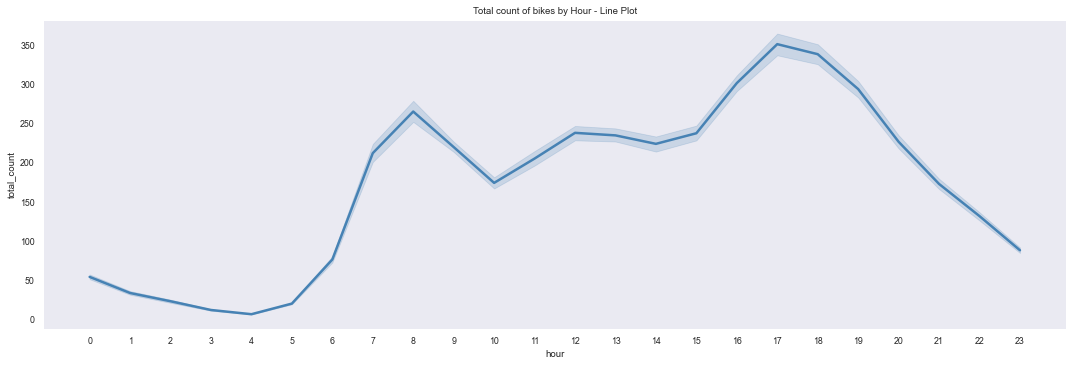

In [165]:
# Total_bikes by Hour - Line Plot

plt.figure(figsize=(15,5))
sns.lineplot(x = hour_df.hour,
             y = hour_df.total_count,
             color = 'steelblue')
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.tight_layout()
plt.title('Total count of bikes by Hour - Line Plot')

Text(0.5, 1.0, 'Total count of bikes by Temperature Level - Line Plot')

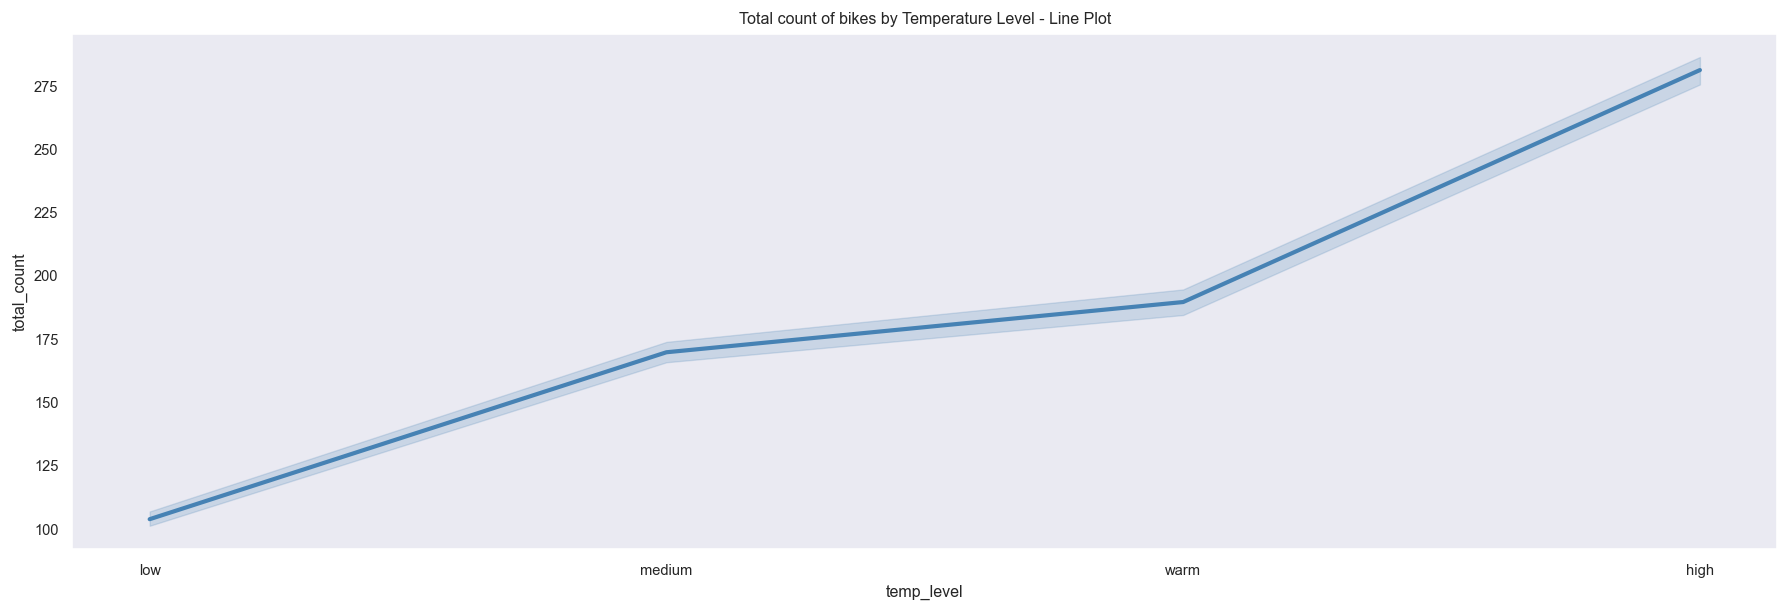

In [278]:
# Total_bikes by Temp Level - Line Plot

plt.figure(figsize=(15,5))
sns.lineplot(x = hour_df.temp_level,
             y = hour_df.total_count,
             color = 'steelblue')

plt.tight_layout()
plt.title('Total count of bikes by Temperature Level - Line Plot')

In [ ]:
# MONDAY - FRIDAY     # Weekend - No peak/rush

# AM Rush
# 5am - 9:30am        # https://www.wmata.com/fares/basic.cfm

# PM Rush
# 3pm - 7pm

# District of Columbia Court - Hours of Operation - https://www.dcd.uscourts.gov

# Monday - Friday
# 9:00 a.m. to 4:00 p.m.

# In general, federal building hours of operation are from 7:30 a.m. to 5:00 p.m.

### Total_bikes by Weekday - Line Plot

<ipython-input-166-de6fb67122dd>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.lineplot(x = hour_df.weekday,


Text(0.5, 1.0, 'Total count of bikes by Weekday - Line Plot')

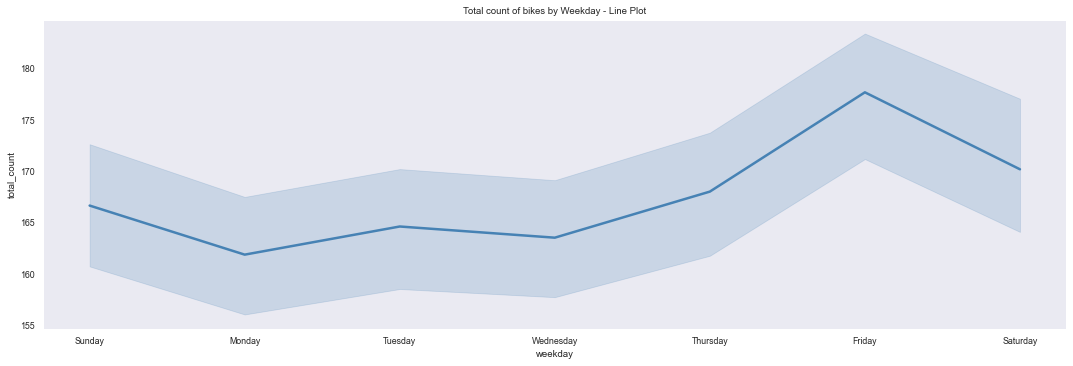

In [166]:
# Total_bikes by Weekday - Line Plot

plt.figure(figsize=(15,5))
sns.lineplot(x = hour_df.weekday,
             y = hour_df.total_count,
             color = 'steelblue') \
   .axes.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xticks([0,1,2,3,4,5,6])
plt.tight_layout()
plt.title('Total count of bikes by Weekday - Line Plot')

### Total_bikes by Holiday - Line Plot

Text(0.5, 1.0, 'Total count of bikes by Holiday - Line Plot')

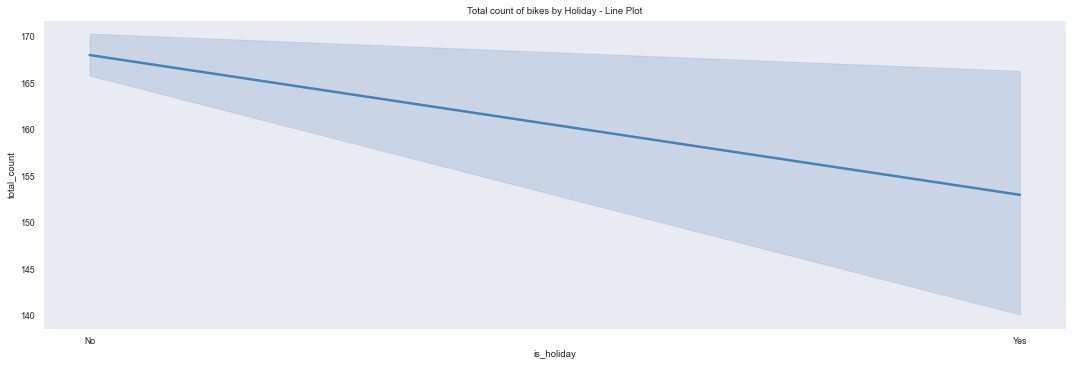

In [167]:
# Total_bikes by Holiday - Line Plot

plt.figure(figsize=(15,5))
sns.lineplot(x = hour_df.is_holiday,
             y = hour_df.total_count,
             color = 'steelblue') \

plt.tight_layout()
plt.title('Total count of bikes by Holiday - Line Plot')

### Total_bikes by Holidays - Box Plot

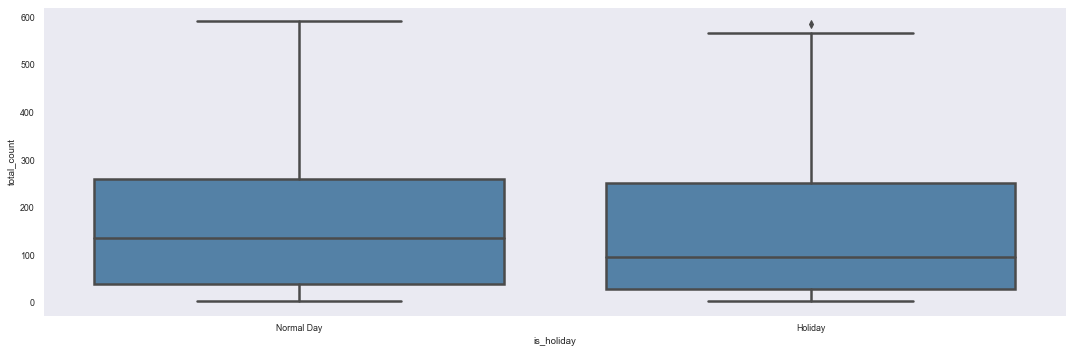

In [170]:
# Total_bikes by Holidays - Box Plot

plt.figure(figsize=(15,5))
sns.boxplot(x = hour_df.is_holiday,
             y = hour_df.total_count,
             color = 'steelblue') \
   .axes.set_xticklabels(['Normal Day', 'Holiday'])
plt.tight_layout()

In [ ]:
# Utilization of bikes during holidays seems lower and with less peaks

#### second quartile is the median !!!

### Total_bikes by Weekend - Line Plot

Text(0.5, 1.0, 'Total count of bikes by Weekend - Line Plot')

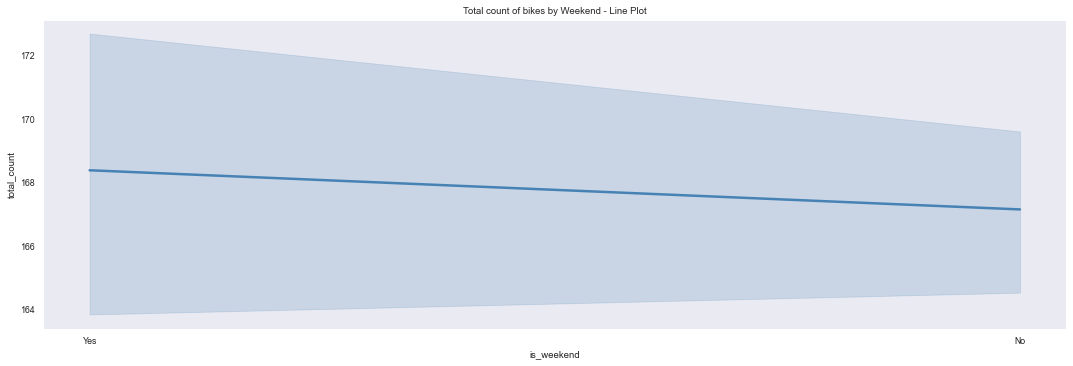

In [168]:
# Total_bikes by Weekend - Line Plot

plt.figure(figsize=(15,5))
sns.lineplot(x = hour_df.is_weekend,
             y = hour_df.total_count,
             color = 'steelblue') \

plt.tight_layout()
plt.title('Total count of bikes by Weekend - Line Plot')

### Total_bikes by Working Day - Box Plot

Text(0.5, 1.0, 'Total count of bikes by Workingday - Box Plot')

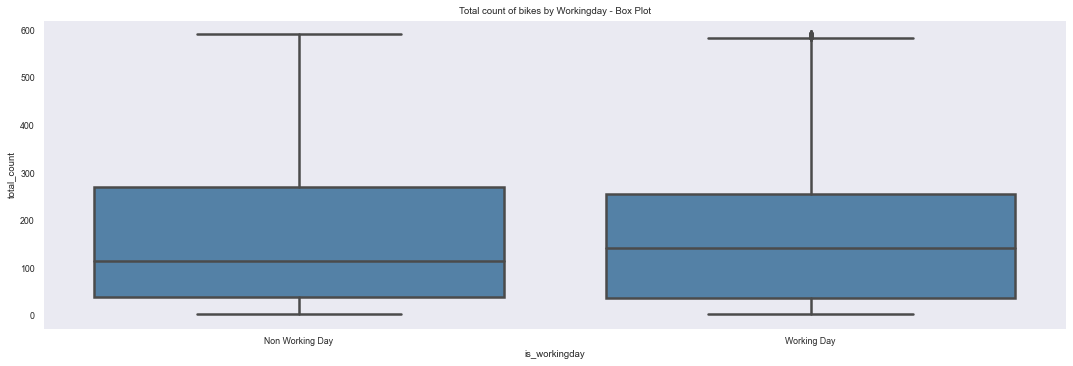

In [183]:
# Total_bikes by Working Day - Box Plot

plt.figure(figsize=(15,5))
sns.boxplot(x = hour_df.is_workingday,
             y = hour_df.total_count,
             color = 'steelblue') \
   .axes.set_xticklabels(['Non Working Day', 'Working Day'])
plt.tight_layout()
plt.title('Total count of bikes by Workingday - Box Plot')

In [ ]:
# Utilization seems higher during working days, with higher peaks.

### Total_bikes by Weather Condition - Line Plot

<ipython-input-184-e9489eeb96ce>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.lineplot(x = hour_df.weather_condition,


Text(0.5, 1.0, 'Total count of bikes by Weather Condition - Line Plot')

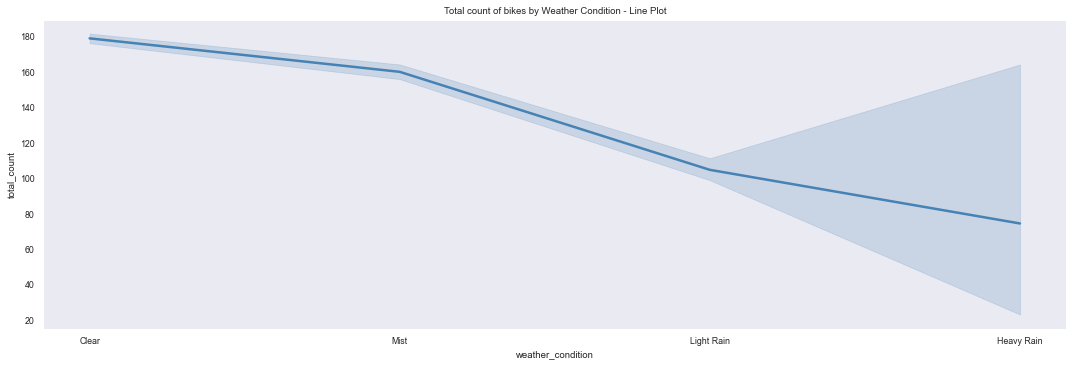

In [184]:
# Total_bikes by Weather Condition - Line Plot

plt.figure(figsize=(15,5))
sns.lineplot(x = hour_df.weather_condition,
             y = hour_df.total_count,
             color = 'steelblue') \
   .axes.set_xticklabels(['Clear', 'Mist', 'Light Rain', 'Heavy Rain'])
plt.xticks([1,2,3,4])
plt.tight_layout()
plt.title('Total count of bikes by Weather Condition - Line Plot')

### Total_bikes by Actual Temperature - Line Plot

Text(0.5, 1.0, 'Total count of bikes by Actual Temperature - Line Plot')

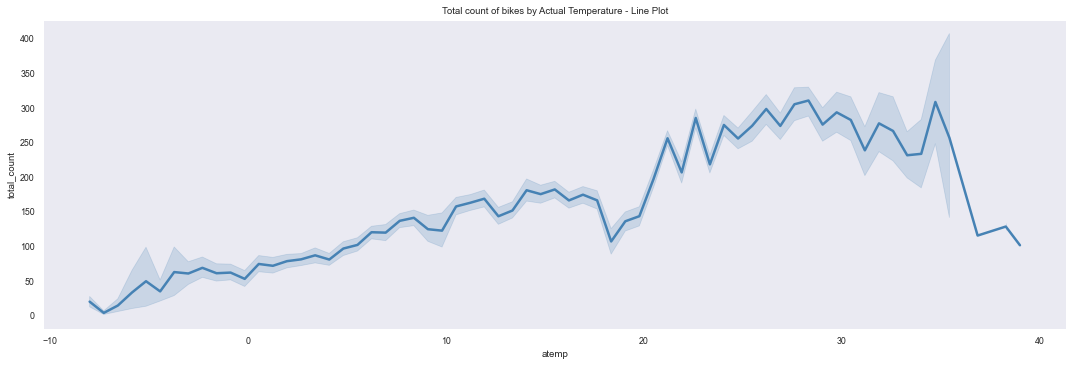

In [185]:
# Total_bikes by Actual Temperature - Line Plot

plt.figure(figsize=(15,5))
sns.lineplot(x = hour_df.atemp,
             y = hour_df.total_count,
             color = 'steelblue')
plt.tight_layout()
plt.title('Total count of bikes by Actual Temperature - Line Plot')

### Total_Bikes by Hour with Holiday Hue

In [ ]:
# Total_Bikes by Hour with Holiday Hue

Text(0.5, 1.0, 'Total count of bikes by Hour with Holiday Hue')

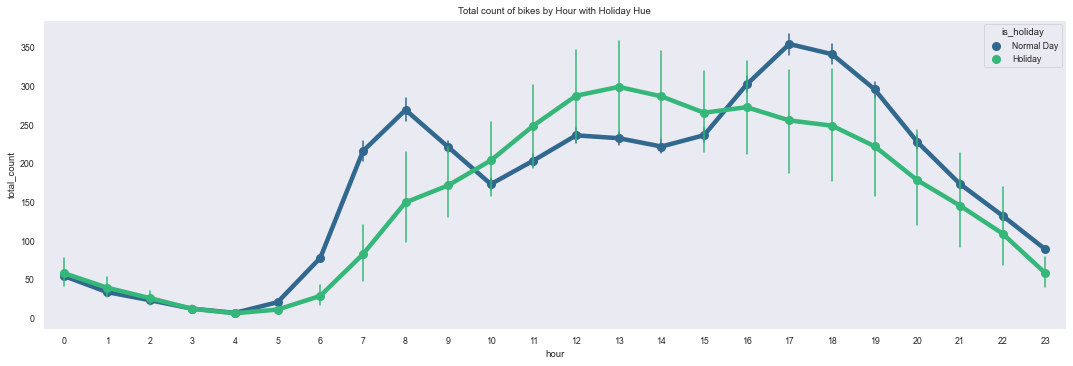

In [186]:
plt.figure(figsize=(15,5))
g = sns.pointplot(y = hour_df.total_count,
             x = hour_df.hour,
             hue = hour_df.is_holiday,
             palette = 'viridis',
             markers='.',
             errwidth = 1.5)
g_legend = g.axes.get_legend()
g_labels = ['Normal Day', 'Holiday']
for t, l in zip(g_legend.texts, g_labels): t.set_text(l)
plt.tight_layout()
plt.title('Total count of bikes by Hour with Holiday Hue')

### Total_Bikes by Hour with Workingday Hue

In [ ]:
# Total_Bikes by Hour with Workingday Hue

Text(0.5, 1.0, 'Total count of bikes by Hour with Workingday Hue')

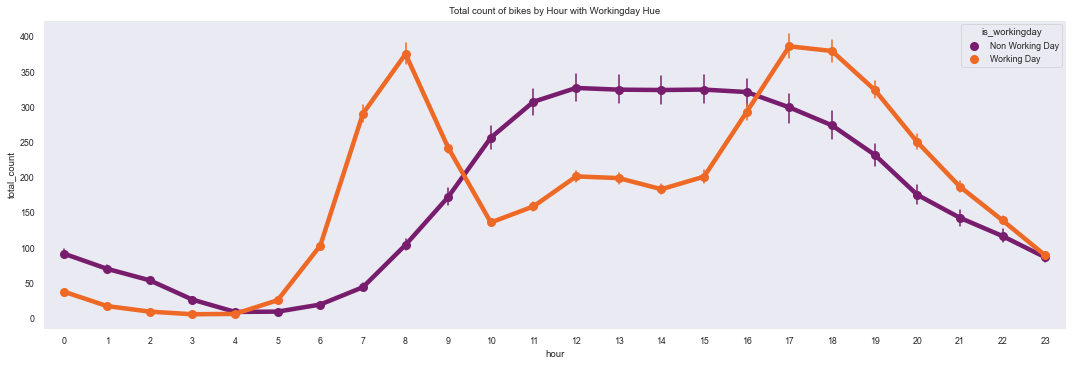

In [187]:
plt.figure(figsize=(15,5))
g = sns.pointplot(y = hour_df.total_count,
             x = hour_df.hour,
             hue = hour_df.is_workingday,
             palette = 'inferno',
             markers='.',
             errwidth = 1.5)
g_legend = g.axes.get_legend()
g_labels = ['Non Working Day', 'Working Day']
for t, l in zip(g_legend.texts, g_labels): t.set_text(l)
# plt.axhline(hours_df.total_bikes.mean()+0.315*hours_df.total_bikes.mean(), color='orange')
plt.tight_layout()
plt.title('Total count of bikes by Hour with Workingday Hue')

### Total_Bike by Hour with Weekend Hue

In [195]:
# Total_Bikes by Hour with Weekend Hue

Text(0.5, 1.0, 'Total count of bikes by Hour with Weekend Hue')

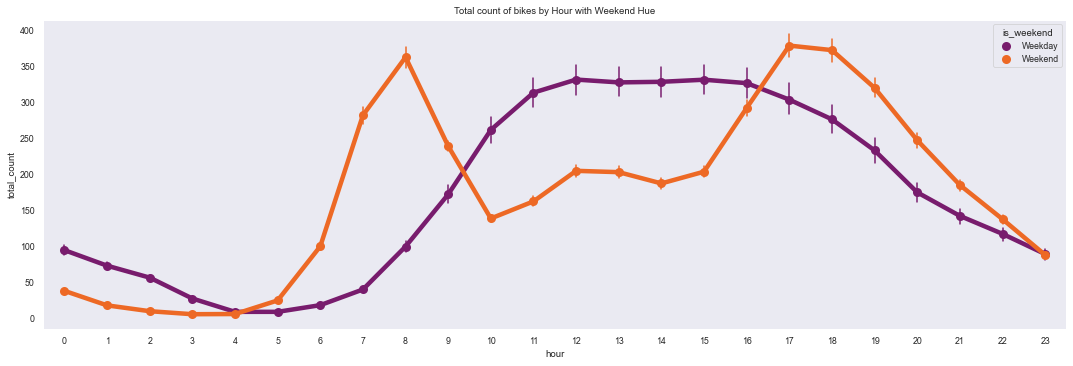

In [189]:
plt.figure(figsize=(15,5))
g = sns.pointplot(y = hour_df.total_count,
             x = hour_df.hour,
             hue = hour_df.is_weekend,
             palette = 'inferno',
             markers='.',
             errwidth = 1.5)
g_legend = g.axes.get_legend()
g_labels = ['Weekday', 'Weekend']
for t, l in zip(g_legend.texts, g_labels): t.set_text(l)
# plt.axhline(hours_df.total_bikes.mean()+0.315*hours_df.total_bikes.mean(), color='orange')
plt.tight_layout()
plt.title('Total count of bikes by Hour with Weekend Hue')

### Total_Bikes by Hour with Weekday Hue

In [ ]:
# Total count of bikes by Hour with Weekday Hue

Text(0.5, 1.0, 'Total count of bikes by Hour with Weekday Hue')

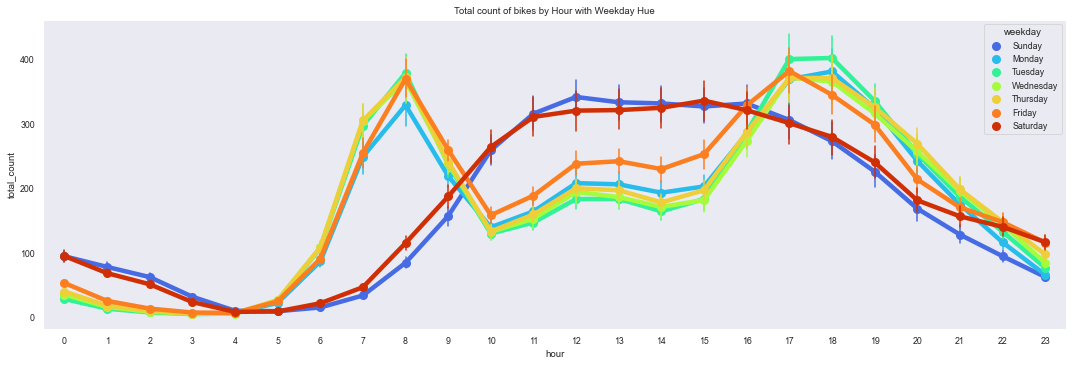

In [192]:
plt.figure(figsize=(15,5))
g = sns.pointplot(y = hour_df.total_count,
             x = hour_df.hour,
             hue = hour_df.weekday,
             palette = 'turbo',
             markers='.',
             errwidth = 1.5)
g_legend = g.axes.get_legend()
g_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# plt.axhline(hours_df.total_bikes.mean(), color='steelblue')
# plt.axhline(hours_df.total_bikes.mean()+0.315*hours_df.total_bikes.mean(), color='orange')
for t, l in zip(g_legend.texts, g_labels): t.set_text(l)
plt.tight_layout()
plt.title('Total count of bikes by Hour with Weekday Hue')

In [ ]:
# The utilization by hour during weekdays differs from the utilization during weekends. 
 # During weekdays, two (2) peaks are present during commute times (around 8am and 5-6pm),while during weekends, utilization is higher during the day between 10am and 6pm.

### Total_Bikes by Hour with Weekday Hue for Registered Users

In [ ]:
# Total_Bikes by Hour with Weekday Hue for Registered Users

Text(0.5, 1.0, 'Total count of bikes by Hour with Weekday Hue for Registered Users')

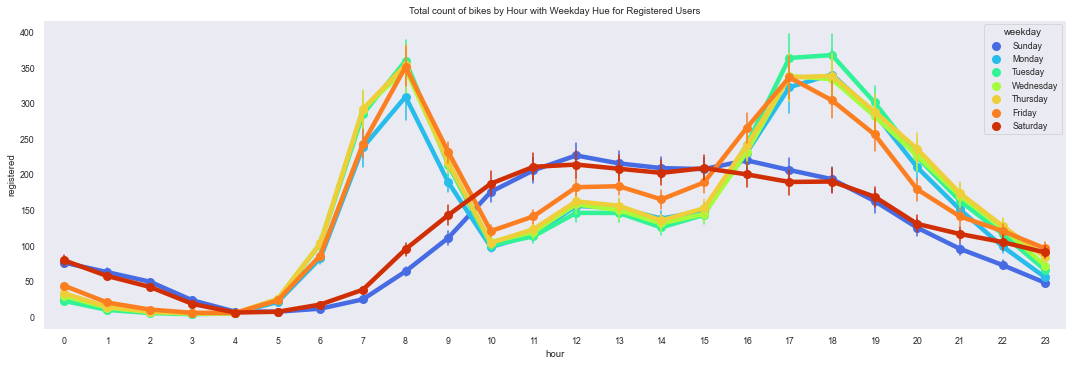

In [193]:
plt.figure(figsize=(15,5))
g = sns.pointplot(y = hour_df.registered,
             x = hour_df.hour,
             hue = hour_df.weekday,
             palette = 'turbo',
             markers='.',
             errwidth = 1.5)
g_legend = g.axes.get_legend()
g_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
for t, l in zip(g_legend.texts, g_labels): t.set_text(l)
plt.tight_layout()
plt.title('Total count of bikes by Hour with Weekday Hue for Registered Users')

In [ ]:
# Registered users seem to be responsible for the two (2) peaks during commute times. They still use the bikes during the weekends.

### Total_Bike by Hour with Weekday Hue for casual Users

Text(0.5, 1.0, 'Total count of bikes by Hour with Weekday Hue for casual Users')

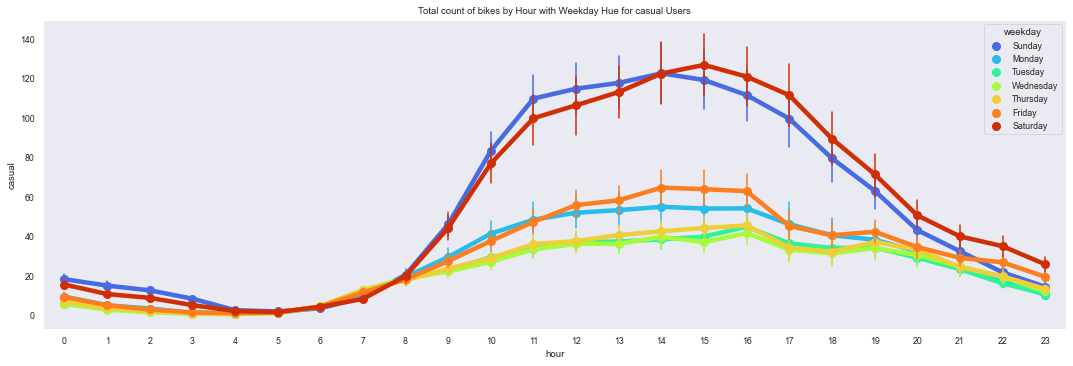

In [194]:
plt.figure(figsize=(15,5))
g = sns.pointplot(y = hour_df.casual,
             x = hour_df.hour,
             hue = hour_df.weekday,
             palette = 'turbo',
             markers='.',
             errwidth = 1.5)
g_legend = g.axes.get_legend()
g_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
for t, l in zip(g_legend.texts, g_labels): t.set_text(l)
plt.tight_layout()
plt.title('Total count of bikes by Hour with Weekday Hue for casual Users')

In [ ]:
# Casual users are mainly using the bikes during the weekends.

In [265]:
hour_df.head()

rec_id   datetime  season  year  month  hour is_holiday  weekday  \
0       1 2011-01-01  Winter     0      1     0         No        6   
1       2 2011-01-01  Winter     0      1     1         No        6   
2       3 2011-01-01  Winter     0      1     2         No        6   
3       4 2011-01-01  Winter     0      1     3         No        6   
4       5 2011-01-01  Winter     0      1     4         No        6   

   is_workingday  weather_condition  temp   atemp  humidity  windspeed  \
0              0                  1  3.28  5.5313      0.81        0.0   
1              0                  1  2.34  4.8169      0.80        0.0   
2              0                  1  2.34  4.8169      0.80        0.0   
3              0                  1  3.28  5.5313      0.75        0.0   
4              0                  1  3.28  5.5313      0.75        0.0   

   casual  registered  total_count is_weekend temp_level  
0       3          13           16        Yes        low  
1       8          32           40        Yes        low  
2       5          27           32        Yes        low  
3       3          10           13        Yes        low  
4       0           1            1        Yes        low

In [264]:
# weathersit : 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

Text(0.5, 1.0, 'Total count of bikes by Hour with Weather condition Hue for total Users')

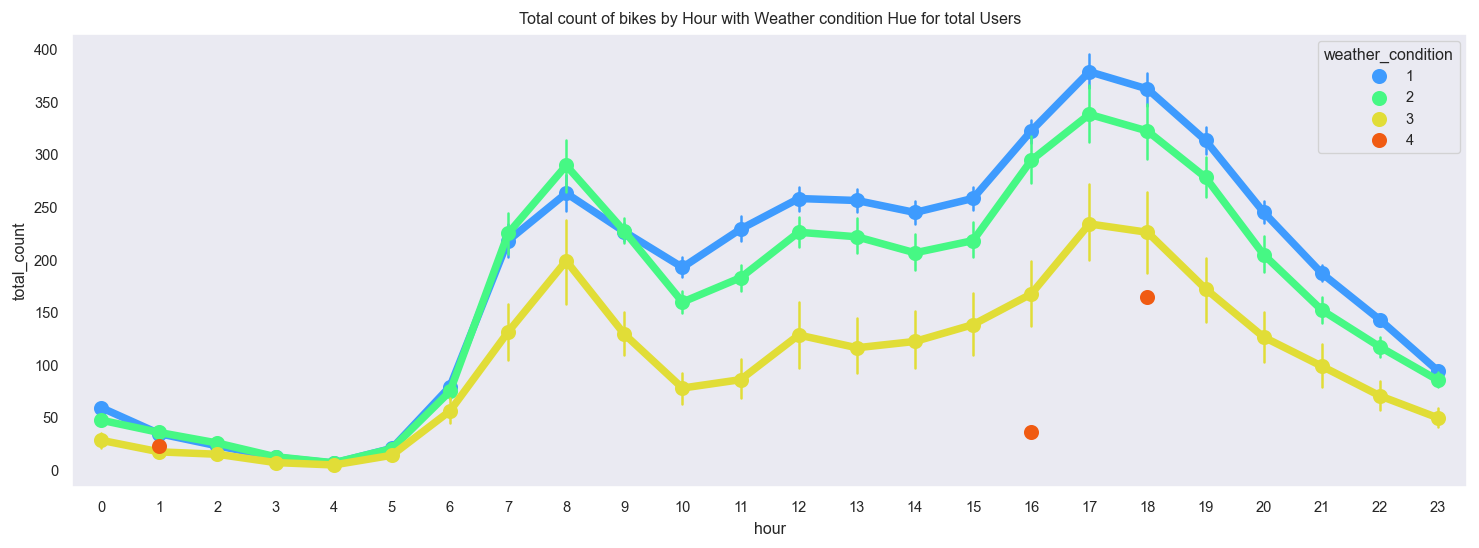

In [273]:
plt.figure(figsize=(15,5))
g = sns.pointplot(y = hour_df.total_count,
             x = hour_df.hour,
             hue = hour_df.weather_condition,
             palette = 'turbo',
             markers='.',
             errwidth = 1.5)
plt.title('Total count of bikes by Hour with Weather condition Hue for total Users')

In [ ]:
# Superstorm Sandy – October 29-30, 2012
# Hurricane Sandy came ashore in New Jersey, but the so called “Frankenstorm” had much wider impacts, 
# with damaging winds throughout the DC area along with heavy rain. 
# 32 inches of snow was recorded at Snowshoe Mountain in West Virginia. 
# Meanwhile, high surf took out half of the pier in Ocean City, MD.

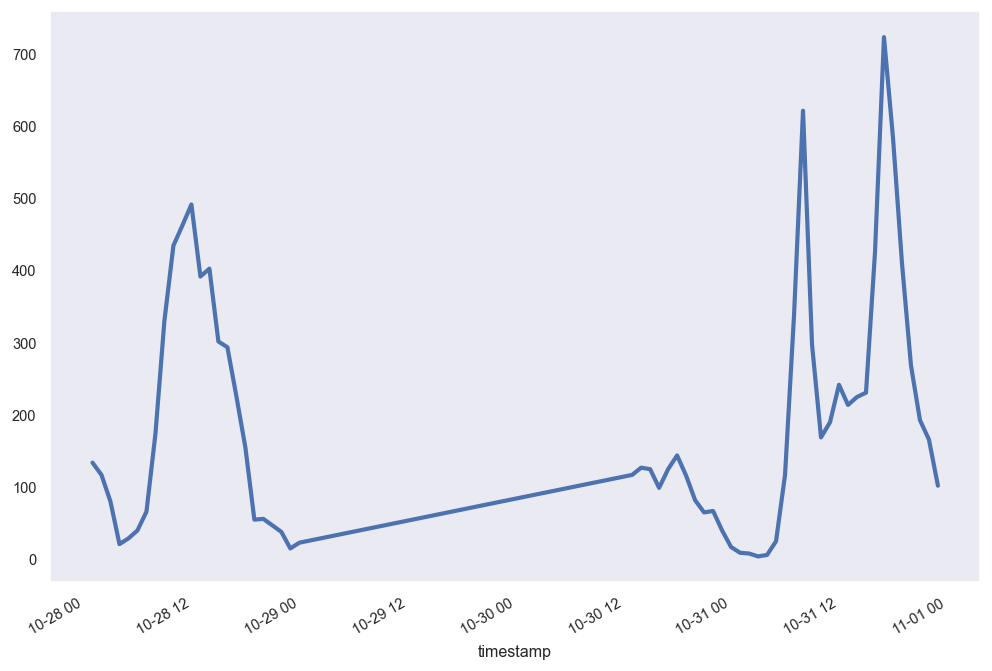

In [270]:
df.loc['2012-10-28 00:01:00' : '2012-10-31 23:00:00']['cnt'].plot(kind = 'line');

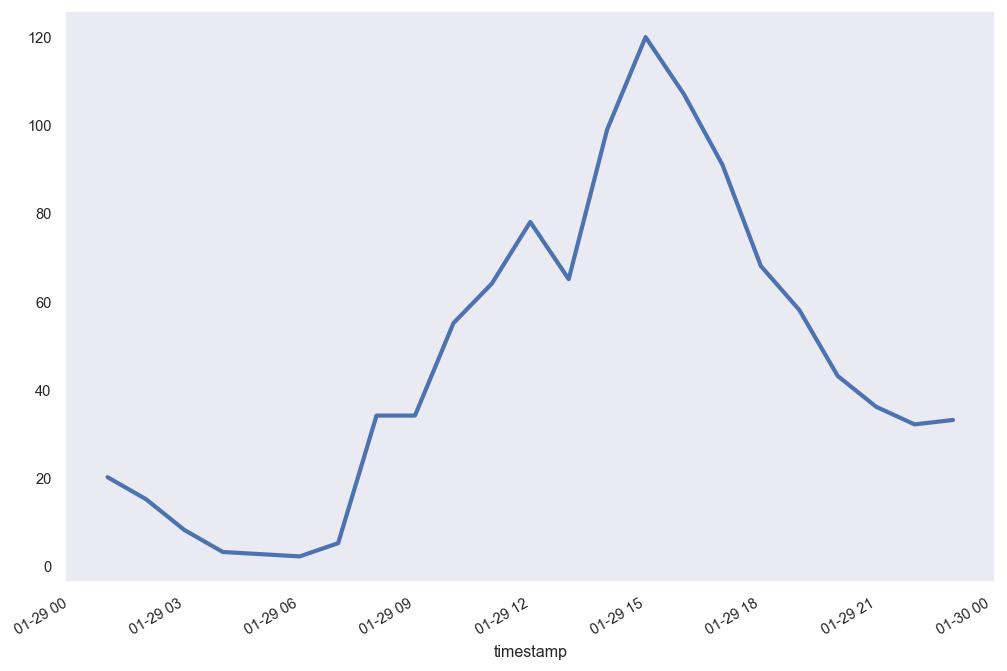

In [272]:
df.loc['2011-01-29 00:01:00' : '2011-01-29 23:00:00']['cnt'].plot(kind = 'line');

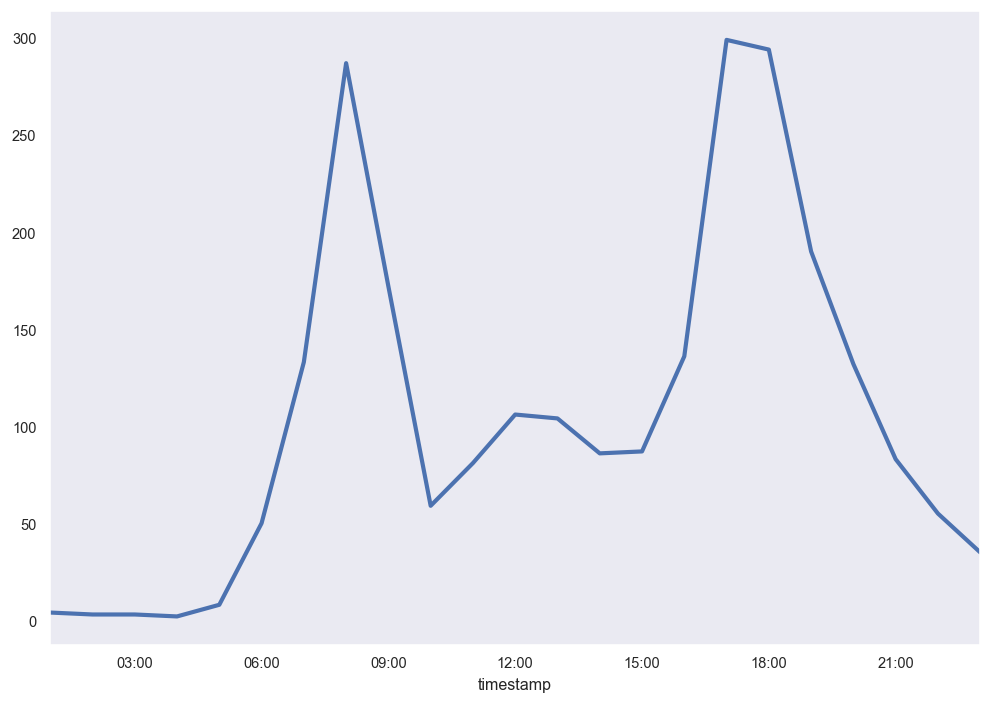

In [286]:
df.loc['2011-03-29 00:01:00' : '2011-03-29 23:00:00']['cnt'].plot(kind = 'line');

In [ ]:
# Commuteageddon – January 26, 2011
# On the evening of January 26th, a potent area of low pressure moved through the Mid Atlantic, 
# with precipitation starting in the form of rain and even thunderstorms, 
# quickly turning over to heavy wet snow as temperatures plummeted. 
# This corresponded with the evening commute, which many in this area will remember for the rest of their lives.
# Many people were stranded in their cars through the night and many more abandoned their vehicles all together.
# Only 5” of snow was recorded at Reagan National and 7.3” at Dulles Airport, 
# but this all came in the span of a few hours, absolutely crippling the roadways across the region.

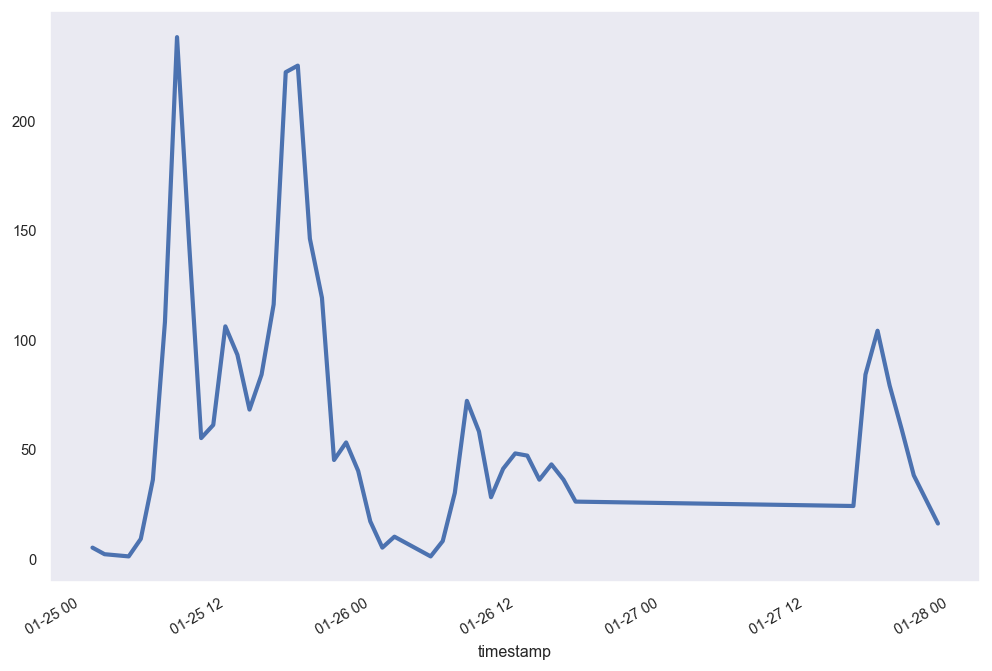

In [269]:
df.loc['2011-01-25 00:01:00' : '2011-01-27 23:00:00']['cnt'].plot(kind = 'line');

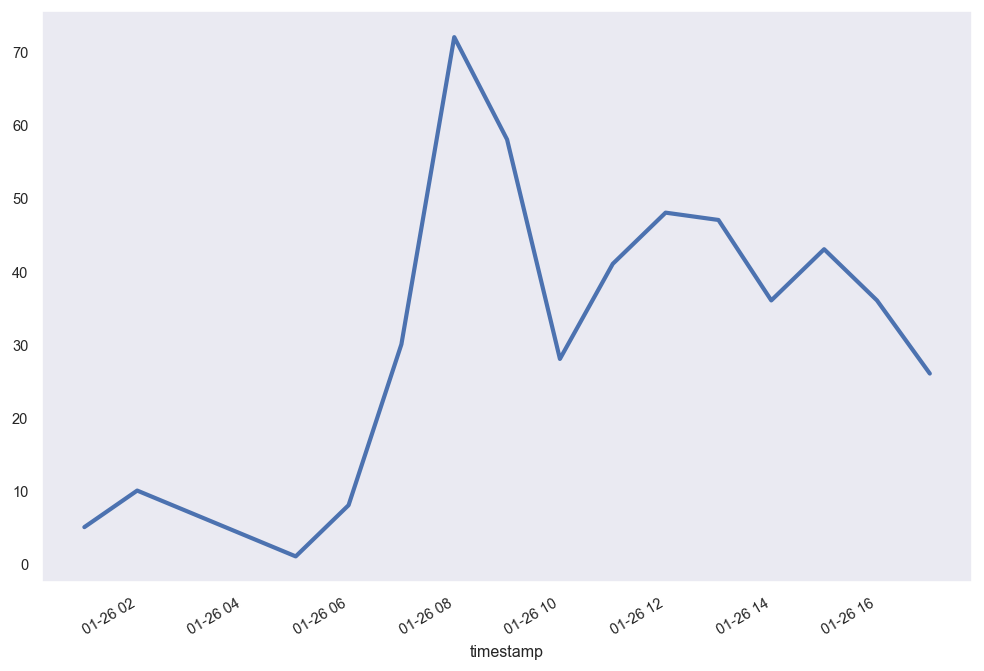

In [271]:
df.loc['2011-01-26 00:01:00' : '2011-01-26 23:00:00']['cnt'].plot(kind = 'line');

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

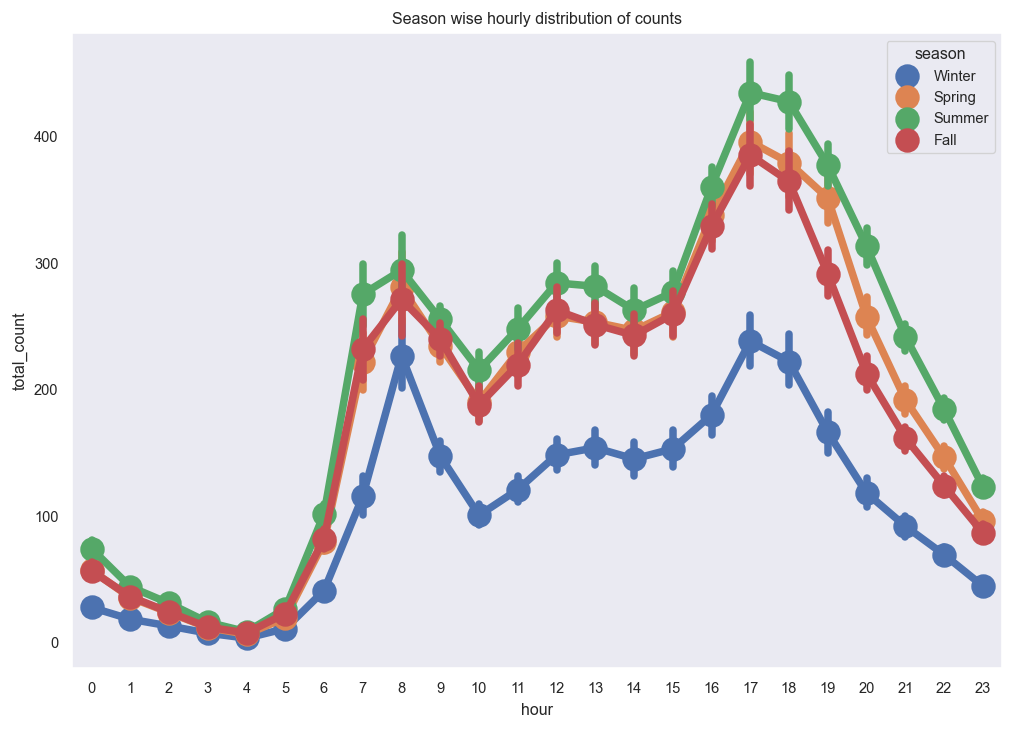

In [279]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'total_count',
                           'season']],
              x='hour',
              y='total_count',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of counts")

Text(0.5, 1.0, 'Total count of bikes by Feeling Temperature in Celsius- Line Plot')

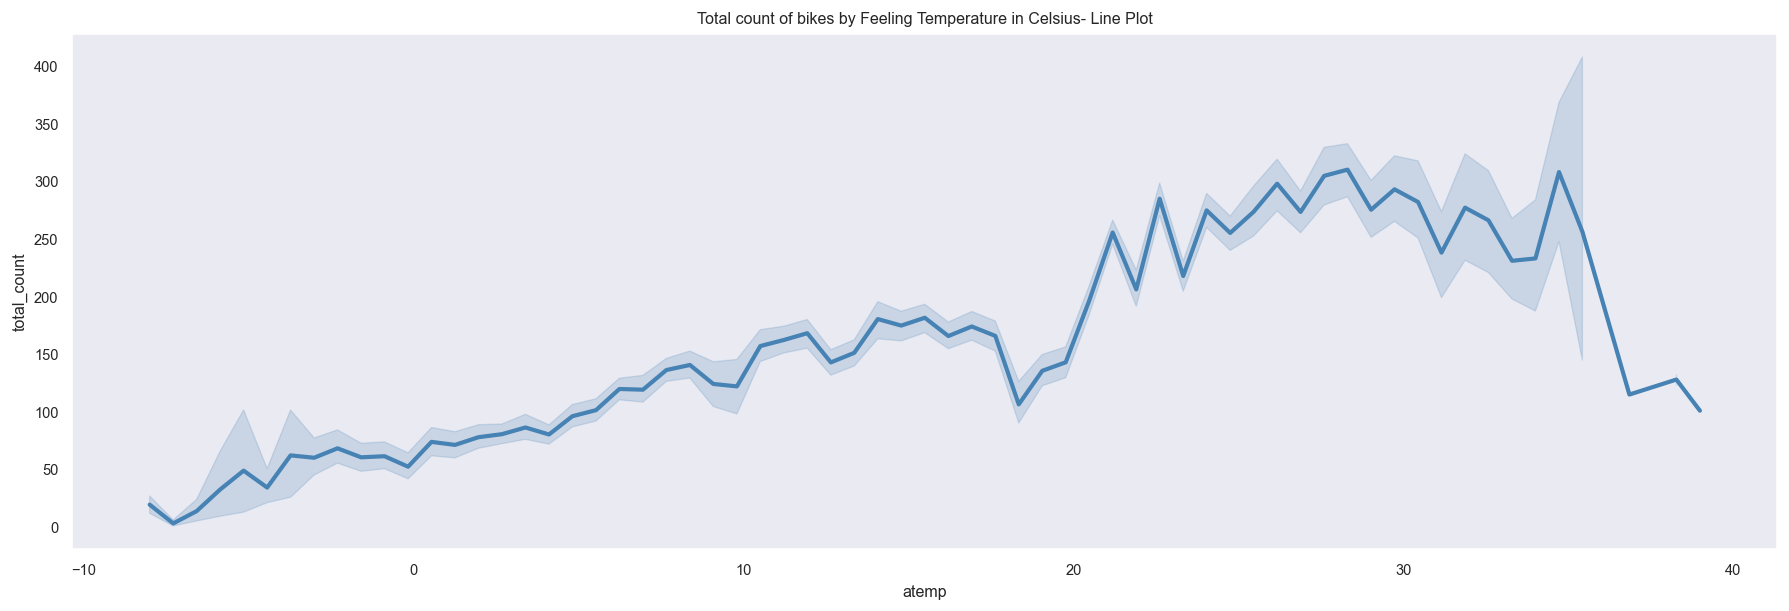

In [284]:
# Total_bikes by atemp - Line Plot

plt.figure(figsize=(15,5))
sns.lineplot(x = hour_df.atemp,
             y = hour_df.total_count,
             color = 'steelblue')

plt.tight_layout()
plt.title('Total count of bikes by Feeling Temperature in Celsius- Line Plot')

In [ ]:
# weathersit : 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

[Text(0.5, 1.0, 'Weather condition wise hourly distribution of counts')]

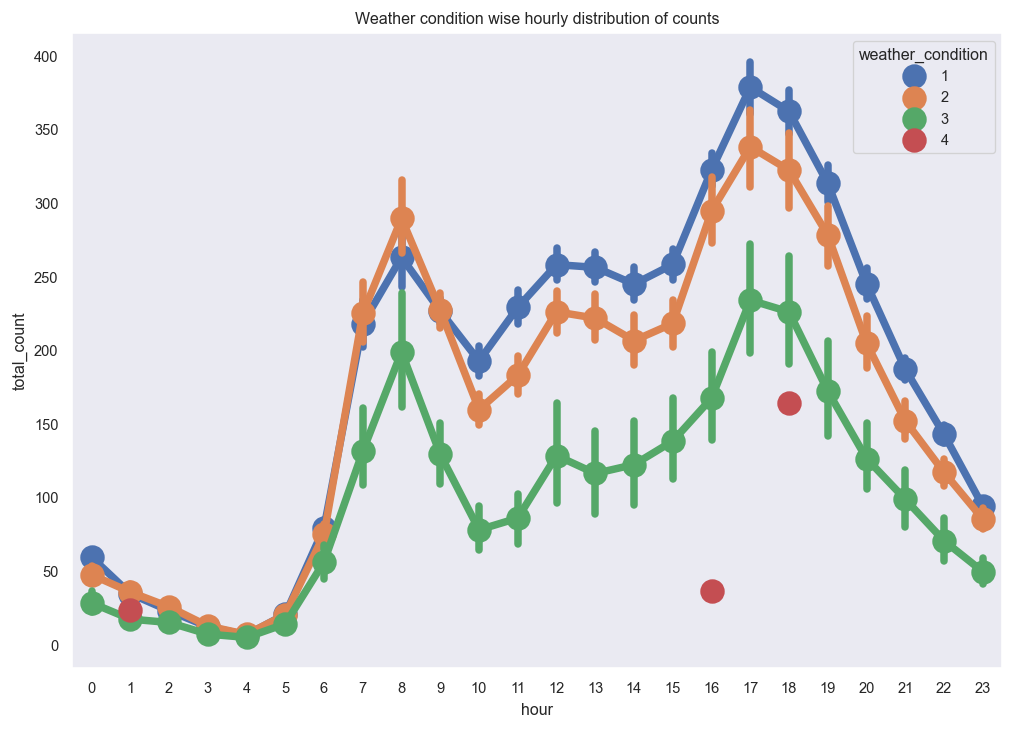

In [282]:

fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'total_count',
                           'weather_condition']],
              x='hour',
              y='total_count',
              hue='weather_condition',
              ax=ax)
ax.set(title="Weather condition wise hourly distribution of counts")

### Time Series

In [256]:
 from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})



In [257]:
df = pd.read_csv('hour.csv')
#df = pd.read_csv('/content/day.csv')
df.hr = df.hr.astype('str')

df['hr']=df['hr'].apply(lambda x: '{0:0>2}'.format(x))
df.loc[:,'timestamp'] = df['dteday'] + ' ' + df['hr']
df['timestamp'] = pd.to_datetime(df['timestamp'], format = '%Y-%m-%d %H')
df['timestamp']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
17374   2012-12-31 19:00:00
17375   2012-12-31 20:00:00
17376   2012-12-31 21:00:00
17377   2012-12-31 22:00:00
17378   2012-12-31 23:00:00
Name: timestamp, Length: 17379, dtype: datetime64[ns]

In [258]:
df.index=df.timestamp

In [259]:
df.head()

instant      dteday  season  yr  mnth  hr  holiday  \
timestamp                                                                 
2011-01-01 00:00:00        1  2011-01-01       1   0     1  00        0   
2011-01-01 01:00:00        2  2011-01-01       1   0     1  01        0   
2011-01-01 02:00:00        3  2011-01-01       1   0     1  02        0   
2011-01-01 03:00:00        4  2011-01-01       1   0     1  03        0   
2011-01-01 04:00:00        5  2011-01-01       1   0     1  04        0   

                     weekday  workingday  weathersit  temp   atemp   hum  \
timestamp                                                                  
2011-01-01 00:00:00        6           0           1  0.24  0.2879  0.81   
2011-01-01 01:00:00        6           0           1  0.22  0.2727  0.80   
2011-01-01 02:00:00        6           0           1  0.22  0.2727  0.80   
2011-01-01 03:00:00        6           0           1  0.24  0.2879  0.75   
2011-01-01 04:00:00        6           0           1  0.24  0.2879  0.75   

                     windspeed  casual  registered  cnt           timestamp  
timestamp                                                                    
2011-01-01 00:00:00        0.0       3          13   16 2011-01-01 00:00:00  
2011-01-01 01:00:00        0.0       8          32   40 2011-01-01 01:00:00  
2011-01-01 02:00:00        0.0       5          27   32 2011-01-01 02:00:00  
2011-01-01 03:00:00        0.0       3          10   13 2011-01-01 03:00:00  
2011-01-01 04:00:00        0.0       0           1    1 2011-01-01 04:00:00

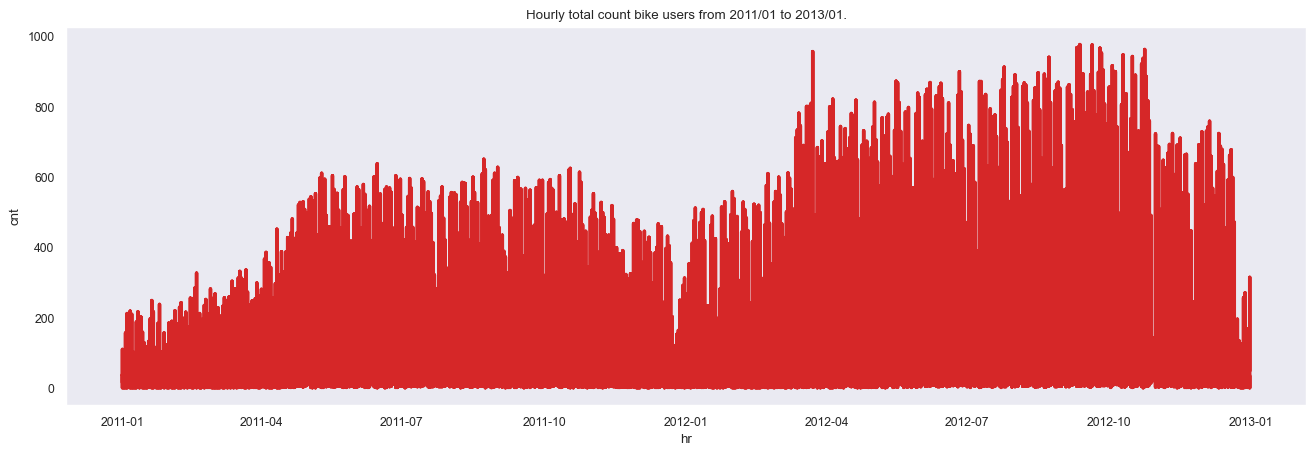

In [260]:
# Draw Plot

def plot_df(ser, x, y, title="", xlabel='hr', ylabel='cnt', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(ser, x=ser.index, y=ser.cnt, title='Hourly total count bike users from 2011/01 to 2013/01.')    

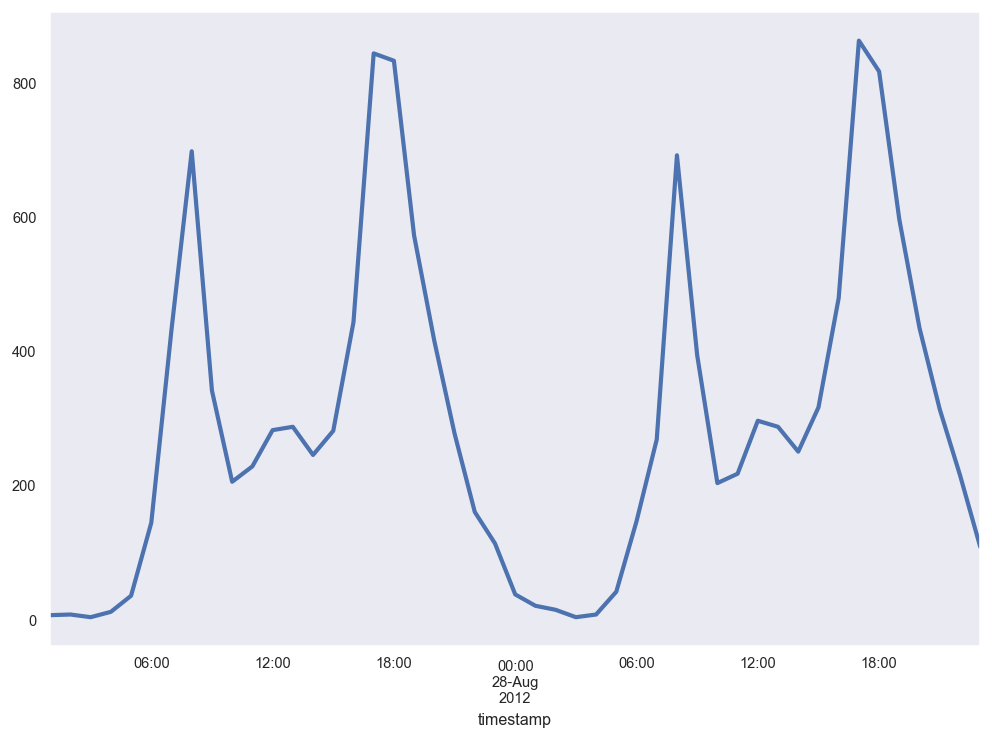

In [250]:
df.loc['2012-08-27 00:01:00' : '2012-08-28 23:00:00']['cnt'].plot(kind = 'line');